# Prediction of obesity levels based on physical activity and eating habits using a trained neural network model
## Phase 1: Data Preparation & Visualisation
#### Group Name: Project Group 78
#### Duy Phong Thach - s3821853
#### Tin Trung Pham - s3666652
#### Van Thai Phan - s3818387


## Table of contents
[Introduction](#itr)

+ [Dataset Source](#Dataset-Source)

+ [Dataset Details](#Dataset-Details)

+ [Dataset Features](#Dataset-Features)

+ [Target Feature](#Target-Feature)

[Goals and Objectives](#Goals-and-Objectives)

[Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)

[Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)

[Literature Review](#Lit-Review)

[Summary and Conclusion](#Summary-and-Conclusion)

[References](#References)


## Introduction <a id='itr'></a>

### Dataset source <a id='Dataset-Source'></a>

This report employed the Obesity Levels dataset from Kaggle (Mehrparvar, 2024). This dataset includes information about the estimation of obesity levels in Mexico, Peru, and Colombia using the individuals' physical condition and eating habits.

### Dataset details <a id='Dataset-Details'></a>

This dataset shows the estimation of obesity levels in Mexico, Peru, and Colombia. It has 17 features and 2111 records. The 17 features include information like gender, age, height, weight, and family history with obesity, along with information about each individual's eating habits and physical condition like if an individual consumes high-caloric food frequently or not, frequency of vegetable consumption, smoking habits, etc. Using these features, the records are divided into the following 7 groups: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

**Importing the data**

The dataset will be read in and the necessary modules will be loaded. Afterward, 10 randomly sampled rows from the dataset will be displayed.


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import io
import requests
pd.set_option('display.max_columns', None) 
#df = df.style.set_precision(3)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [2]:
df_name = 'ObesityDataSet_raw_and_data_sinthetic.csv'
obesity_df = pd.read_csv(df_name)
num_rows, num_columns = obesity_df.shape
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

The DataFrame has 2111 rows and 17 columns.


In [3]:
obesity_df.sample(10, random_state=999)

Age  Gender    Height     Weight       CALC FAVC      FCVC  \
1487  39.126310  Female  1.562889  76.659490  Sometimes  yes  2.000000   
440   18.000000  Female  1.550000  56.000000         no  yes  2.000000   
1060  34.281681  Female  1.673333  77.205685         no  yes  2.689929   
875   16.865984  Female  1.644053  67.439589         no  yes  1.314150   
1312  31.641081    Male  1.676595  89.993812  Sometimes  yes  2.934671   
1299  21.008051  Female  1.650000  88.126544         no  yes  2.457547   
1413  40.466313  Female  1.559005  77.601483  Sometimes  yes  2.000000   
574   19.833682  Female  1.699464  49.676046  Sometimes  yes  1.270448   
1241  40.951591  Female  1.542122  80.000000  Sometimes  yes  2.000000   
271   19.000000  Female  1.500000  50.000000  Sometimes  yes  2.000000   

           NCP  SCC SMOKE      CH2O family_history_with_overweight       FAF  \
1487  3.000000   no    no  1.440526                            yes  0.000000   
440   3.000000   no    no  1.000000                             no  0.000000   
1060  1.835543   no    no  1.718569                            yes  0.674348   
875   1.068196  yes    no  1.364957                            yes  0.000000   
1312  2.119682   no    no  2.041462                            yes  0.578074   
1299  1.000610   no    no  3.000000                            yes  1.361533   
1413  3.000000   no    no  1.572371                            yes  0.000000   
574   3.731212   no    no  1.876915                             no  2.000000   
1241  1.105617   no    no  1.372811                            yes  1.629432   
271   3.000000   no    no  1.000000                             no  0.000000   

           TUE        CAEC                 MTRANS           NObeyesdad  
1487  0.000000   Sometimes             Automobile       Obesity_Type_I  
440   0.000000   Sometimes             Automobile        Normal_Weight  
1060  0.707246   Sometimes             Automobile  Overweight_Level_II  
875   0.057926   Sometimes  Public_Transportation   Overweight_Level_I  
1312  0.000000   Sometimes             Automobile       Obesity_Type_I  
1299  1.000000   Sometimes  Public_Transportation       Obesity_Type_I  
1413  0.000000   Sometimes             Automobile       Obesity_Type_I  
574   1.000000  Frequently  Public_Transportation  Insufficient_Weight  
1241  0.000000   Sometimes             Automobile       Obesity_Type_I  
271   2.000000  Frequently  Public_Transportation        Normal_Weight

### Dataset features <a id='Dataset-Features'></a>

The following table includes all the features that will be used in the report and their explanations.

In [4]:
from tabulate import tabulate
table = [
    ['Name', 'Data Type', 'Units', 'Description'],
    ['Gender', 'Categorical Nominal', 'NA', "Individual's gender"],
    ['Age', 'Numerical Continuous', 'NA', "Individual's age"],
    ['Height', 'Numerical Continuous', 'Meters', "Individual's height"],
    ['Weight', 'Numerical Continuous', 'KG', "Individual's weight"],
    ['CALC', 'Categorical Ordinal', 'NA', 'Frequency of alcohol consumption'],
    ['FAVC', 'Binary', 'NA', 'Does the individual consume high-caloric food frequently?'],
    ['FCVC', 'Integer', 'NA', 'Vegetable consumption divided into 3 groups:1<x≤1.5 (never), 1.5<x≤2.5 (sometimes), 2.5<x≤3 (always)'],
    ['NCP', 'Numerical Continuous', 'NA', 'Number of main meals per day'],
    ['SCC', 'Binary', 'NA', 'Does the individual monitor their calorie intake?'],
    ['SMOKE', 'Binary', 'NA', 'Does the individual smoke?'],
    ['CH2O', 'Numerical Continuous', 'Litre', 'Daily water consumption'],
    ['family_history_with_overweight', 'Binary', 'NA', 'Does the individual have family members who are overweight?'],
    ['FAF', 'Numerical Continuous', 'Days', 'Frequency of physical activity per week'],
    ['TUE', 'Integer', 'Hours', 'Time using electronic devices'],
    ['CAEC', 'Categorical Ordinal', 'NA', 'Frequency of eating between meals'],
    ['MTRANS', 'Categorical Nominal', 'NA', "Individual's mode of transport"],
    ['NObeyesdad', 'Categorical Ordinal', 'NA', "Individual's obesity level"]
]

print(tabulate(table, headers='firstrow', tablefmt='grid'))

         

+--------------------------------+----------------------+---------+------------------------------------------------------------------------------------------------------+
| Name                           | Data Type            | Units   | Description                                                                                          |
+================================+======================+=========+======================================================================================================+
| Gender                         | Categorical Nominal  | NA      | Individual's gender                                                                                  |
+--------------------------------+----------------------+---------+------------------------------------------------------------------------------------------------------+
| Age                            | Numerical Continuous | NA      | Individual's age                                                             

## Target feature <a id='Target-Feature'></a>

As the main objective of this project is to explore the factors that influence obesity in Mexico, Peru, and Colombia, our target feature is clearly an individual's obesity level (NObeyesdad), which is predicted by using descriptive features.

In [7]:
target_count=obesity_df['NObeyesdad'].unique().tolist()

In [8]:
print(f'The target feature is categorical data, that has {len(target_count)} levels, which are: {target_count} ')

The target feature is categorical data, that has 7 levels, which are: ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III'] 


## Goal & Objectives: <a id='Goals-and-Objectives'></a>

Preventive health interventions may benefit from the use of a prediction model that reliably identifies those who are at high risk of obesity. With the use of such a model, medical professionals might act earlier and customise treatments, diets, and exercise regimens to meet the needs of each patient. It would also assist public health departments in organising educational campaigns and allocating resources more effectively.
Therefore, the primary goals of the "Predicting Obesity Level" project are two-fold:

Predict Obesity Risk: Develop a model that can predict the likelihood of an individual becoming obese based on a set of identifiable factors and metrics.
Identify Key Predictors: Determine which features are the most significant predictors of becoming obese, thus providing insights into targeted prevention strategies.
Using descriptive statistics and visualization approaches for exploratory data analysis is one of the project's secondary goals. With careful data cleaning and preparation behind us, this will assist reveal underlying patterns and correlations in the data. In order to create a strong predictive model, it is imperative to complete this exploratory phase in order to comprehend the dataset's dynamics.
The "Predicting Obesity Level" initiative aims to reduce obesity through early intervention and well-informed public health measures by accomplishing these gas a contributing factor to obesity levels.

# Data Cleaning and Preprocessing <a id='Data-Cleaning-and-Preprocessing'></a>

### ID-Like Columns, Irrelevant Features and Other Redundant Features

As can be seen from the table above, there are 17 descriptive variables and not containing any ID-Like Columns. All desriptive variables provide variety of information leading to obesity, thus they are all relevant features.

### Constant Features

Constant features  can affect data exploration process, so it should be checked and removed. 
There are no constant features in each columns.

In [9]:
obesity_df.loc[:, obesity_df.nunique() == 1].sum()

Series([], dtype: float64)

Let's check the column name. We need to rename column names if neccessary.

In [10]:
obesity_df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

As we can see, the column names in dataframe are difficult to understand and remember for data cleaning and processing. Therefore, we will rename some column names and make all column names lower case. By doing this, we can also remove all redundant white space.

In [11]:
columns_mapping = {
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'CALC': 'frequenly_alcohol_consume',
    'FAVC': 'frequenly_high-caloric_food_consume',
    'FCVC': 'vegetable_consumption',
    'NCP': 'main_meal_per_day',
    'SCC': 'calories_in_monitor',
    'SMOKE': 'smoke',
    'CH2O': 'daily_water_consume',
    'SMOKE': 'smoke', 
    'FAF': 'physical_activity_per_week',
    'TUE': 'electronic_device_use_hour',
    'CAEC': 'eating_frequency',
    'MTRANS': 'transport_mode',
    'NObeyesdad': 'obesity_level'

    
}

# rename columns
df = obesity_df.rename(columns = columns_mapping)
df.sample(5, random_state=999)

age  gender    height     weight frequenly_alcohol_consume  \
1487  39.126310  Female  1.562889  76.659490                 Sometimes   
440   18.000000  Female  1.550000  56.000000                        no   
1060  34.281681  Female  1.673333  77.205685                        no   
875   16.865984  Female  1.644053  67.439589                        no   
1312  31.641081    Male  1.676595  89.993812                 Sometimes   

     frequenly_high-caloric_food_consume  vegetable_consumption  \
1487                                 yes               2.000000   
440                                  yes               2.000000   
1060                                 yes               2.689929   
875                                  yes               1.314150   
1312                                 yes               2.934671   

      main_meal_per_day calories_in_monitor smoke  daily_water_consume  \
1487           3.000000                  no    no             1.440526   
440            3.000000                  no    no             1.000000   
1060           1.835543                  no    no             1.718569   
875            1.068196                 yes    no             1.364957   
1312           2.119682                  no    no             2.041462   

     family_history_with_overweight  physical_activity_per_week  \
1487                            yes                    0.000000   
440                              no                    0.000000   
1060                            yes                    0.674348   
875                             yes                    0.000000   
1312                            yes                    0.578074   

      electronic_device_use_hour eating_frequency         transport_mode  \
1487                    0.000000        Sometimes             Automobile   
440                     0.000000        Sometimes             Automobile   
1060                    0.707246        Sometimes             Automobile   
875                     0.057926        Sometimes  Public_Transportation   
1312                    0.000000        Sometimes             Automobile   

            obesity_level  
1487       Obesity_Type_I  
440         Normal_Weight  
1060  Overweight_Level_II  
875    Overweight_Level_I  
1312       Obesity_Type_I

Checking data type

In [12]:
df.dtypes

age                                    float64
gender                                  object
height                                 float64
weight                                 float64
frequenly_alcohol_consume               object
frequenly_high-caloric_food_consume     object
vegetable_consumption                  float64
main_meal_per_day                      float64
calories_in_monitor                     object
smoke                                   object
daily_water_consume                    float64
family_history_with_overweight          object
physical_activity_per_week             float64
electronic_device_use_hour             float64
eating_frequency                        object
transport_mode                          object
obesity_level                           object
dtype: object

CHECKING MISSING VALUES

In [13]:
df.isnull().sum()

age                                    0
gender                                 0
height                                 0
weight                                 0
frequenly_alcohol_consume              0
frequenly_high-caloric_food_consume    0
vegetable_consumption                  0
main_meal_per_day                      0
calories_in_monitor                    0
smoke                                  0
daily_water_consume                    0
family_history_with_overweight         0
physical_activity_per_week             0
electronic_device_use_hour             0
eating_frequency                       0
transport_mode                         0
obesity_level                          0
dtype: int64

CHECKING NaN VALUES

In [14]:
df.isna().sum()

age                                    0
gender                                 0
height                                 0
weight                                 0
frequenly_alcohol_consume              0
frequenly_high-caloric_food_consume    0
vegetable_consumption                  0
main_meal_per_day                      0
calories_in_monitor                    0
smoke                                  0
daily_water_consume                    0
family_history_with_overweight         0
physical_activity_per_week             0
electronic_device_use_hour             0
eating_frequency                       0
transport_mode                         0
obesity_level                          0
dtype: int64

As we can see from above, we do not have any missing values and NaN values. 
Data types of all column are correct and matched with given values. Thus, we do not need to change anything here.

Let's check values in categorical data. We will firstly list all categorical columns, then checking for unusual values as well as remove any white spaces and put all values to lower case.

In [15]:
#List of categorical columns
categorical_cols = list(df.columns[df.dtypes == object])
print(categorical_cols)

['gender', 'frequenly_alcohol_consume', 'frequenly_high-caloric_food_consume', 'calories_in_monitor', 'smoke', 'family_history_with_overweight', 'eating_frequency', 'transport_mode', 'obesity_level']


In [16]:
#Check unique values in categorical data
for col in categorical_cols:
    df[col] = df[col].str.lower().str.strip()
    print(f'The unique values for {col} are:')
    print(df[col].unique())
    print('\n')

The unique values for gender are:
['female' 'male']


The unique values for frequenly_alcohol_consume are:
['no' 'sometimes' 'frequently' 'always']


The unique values for frequenly_high-caloric_food_consume are:
['no' 'yes']


The unique values for calories_in_monitor are:
['no' 'yes']


The unique values for smoke are:
['no' 'yes']


The unique values for family_history_with_overweight are:
['yes' 'no']


The unique values for eating_frequency are:
['sometimes' 'frequently' 'always' 'no']


The unique values for transport_mode are:
['public_transportation' 'walking' 'automobile' 'motorbike' 'bike']


The unique values for obesity_level are:
['normal_weight' 'overweight_level_i' 'overweight_level_ii'
 'obesity_type_i' 'insufficient_weight' 'obesity_type_ii'
 'obesity_type_iii']




As we can see, all categorical columns has proper unique values. There are no unusual values to be removed. All white spaces, if available, was removed and all values are in lower case.

Let's check statistical values to see any improper values if available

In [17]:
df.describe(include='number').round(3)

age    height    weight  vegetable_consumption  main_meal_per_day  \
count  2111.000  2111.000  2111.000               2111.000           2111.000   
mean     24.313     1.702    86.586                  2.419              2.686   
std       6.346     0.093    26.191                  0.534              0.778   
min      14.000     1.450    39.000                  1.000              1.000   
25%      19.947     1.630    65.473                  2.000              2.659   
50%      22.778     1.700    83.000                  2.386              3.000   
75%      26.000     1.768   107.431                  3.000              3.000   
max      61.000     1.980   173.000                  3.000              4.000   

       daily_water_consume  physical_activity_per_week  \
count             2111.000                    2111.000   
mean                 2.008                       1.010   
std                  0.613                       0.851   
min                  1.000                       0.000   
25%                  1.585                       0.125   
50%                  2.000                       1.000   
75%                  2.477                       1.667   
max                  3.000                       3.000   

       electronic_device_use_hour  
count                    2111.000  
mean                        0.658  
std                         0.609  
min                         0.000  
25%                         0.000  
50%                         0.625  
75%                         1.000  
max                         2.000

In [18]:
df.describe(include= object)

gender frequenly_alcohol_consume frequenly_high-caloric_food_consume  \
count    2111                      2111                                2111   
unique      2                         4                                   2   
top      male                 sometimes                                 yes   
freq     1068                      1401                                1866   

       calories_in_monitor smoke family_history_with_overweight  \
count                 2111  2111                           2111   
unique                   2     2                              2   
top                     no    no                            yes   
freq                  2015  2067                           1726   

       eating_frequency         transport_mode   obesity_level  
count              2111                   2111            2111  
unique                4                      5               7  
top           sometimes  public_transportation  obesity_type_i  
freq               1765                   1580             351

Now, everything is ready for data exploration and visualisation.

## DATA EXPLORATION AND VISUALISATION <a id='Data-Exploration-and-Visualisation'></a>


### One variable

### Figure 1: Bar chart of people in different obesity level

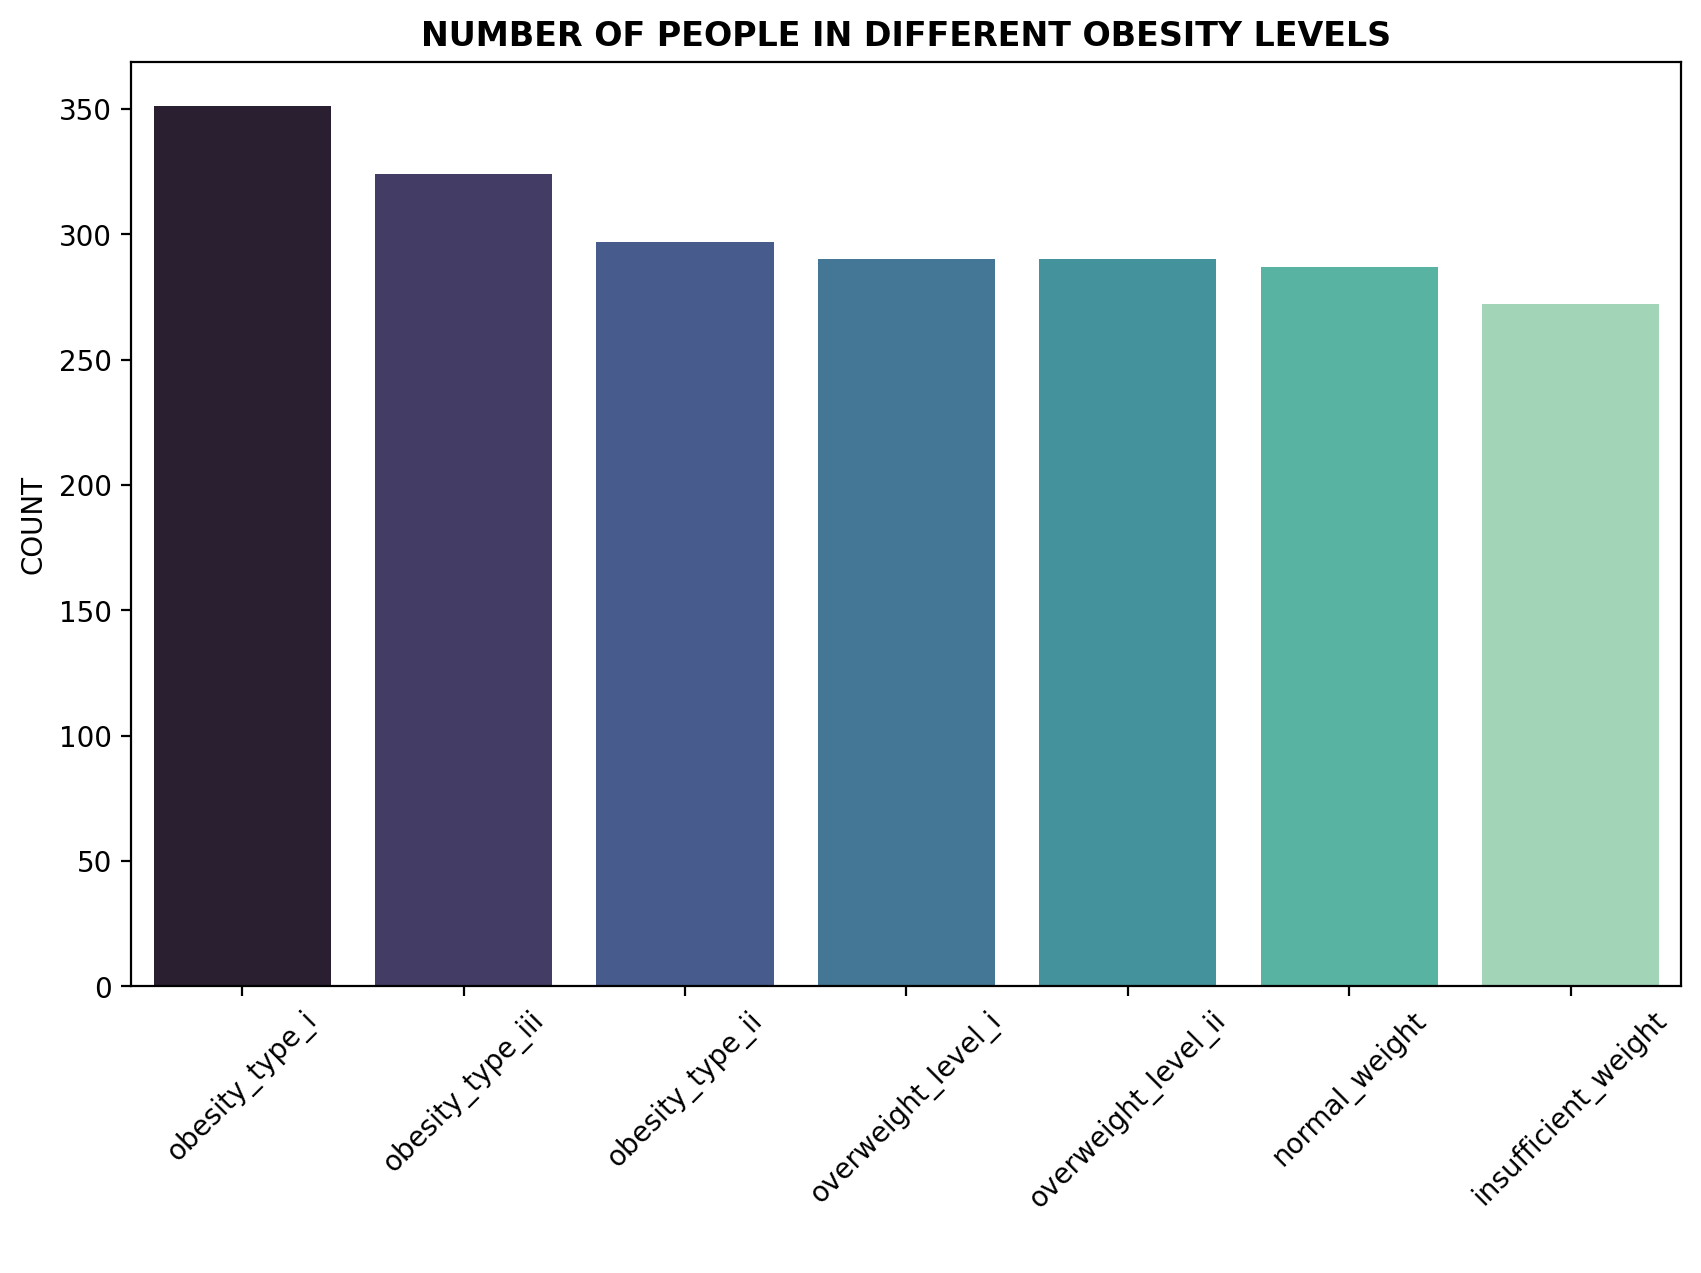

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['obesity_level'] ,order=df['obesity_level'].value_counts().index[:10], data = df , palette = 'mako')
plt.xticks(rotation=45)
plt.ylabel('COUNT')
plt.xlabel(' ')
plt.title('NUMBER OF PEOPLE IN DIFFERENT OBESITY LEVELS',fontweight='bold')
plt.show()

We count the number of observations in each obesity_levels variables to see the number of people in each group. As we can see, all three 
types of obesity took top 3 places of having highest number of people. The lowest group is insufficient weight. 

### Figure 2: Histogram of Daily Water Consumption

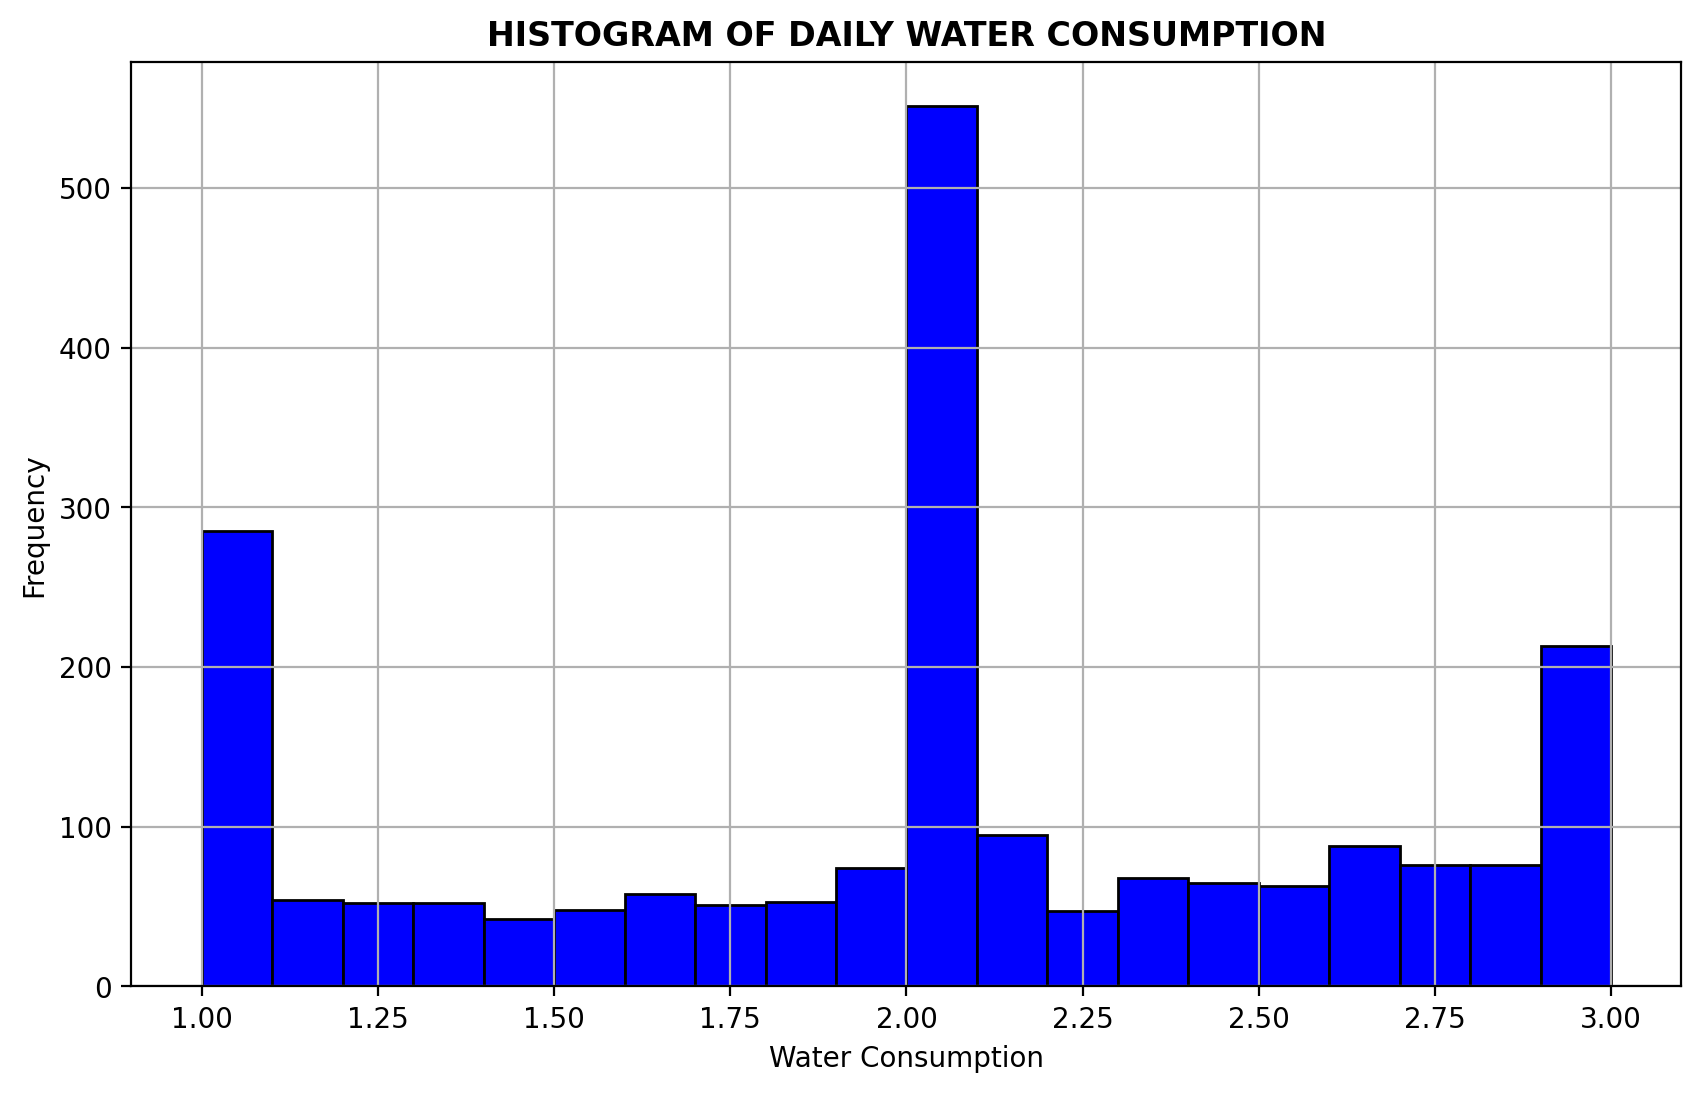

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data=df, x='daily_water_consume',bins=20,color='blue',edgecolor='black')
plt.title('HISTOGRAM OF DAILY WATER CONSUMPTION',weight='bold')
plt.xlabel('Water Consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram illustrates the frequency of water consumption. It is clear that most of people drank 2 litre of water per day. 

### Figure 3: Distribution of Weight

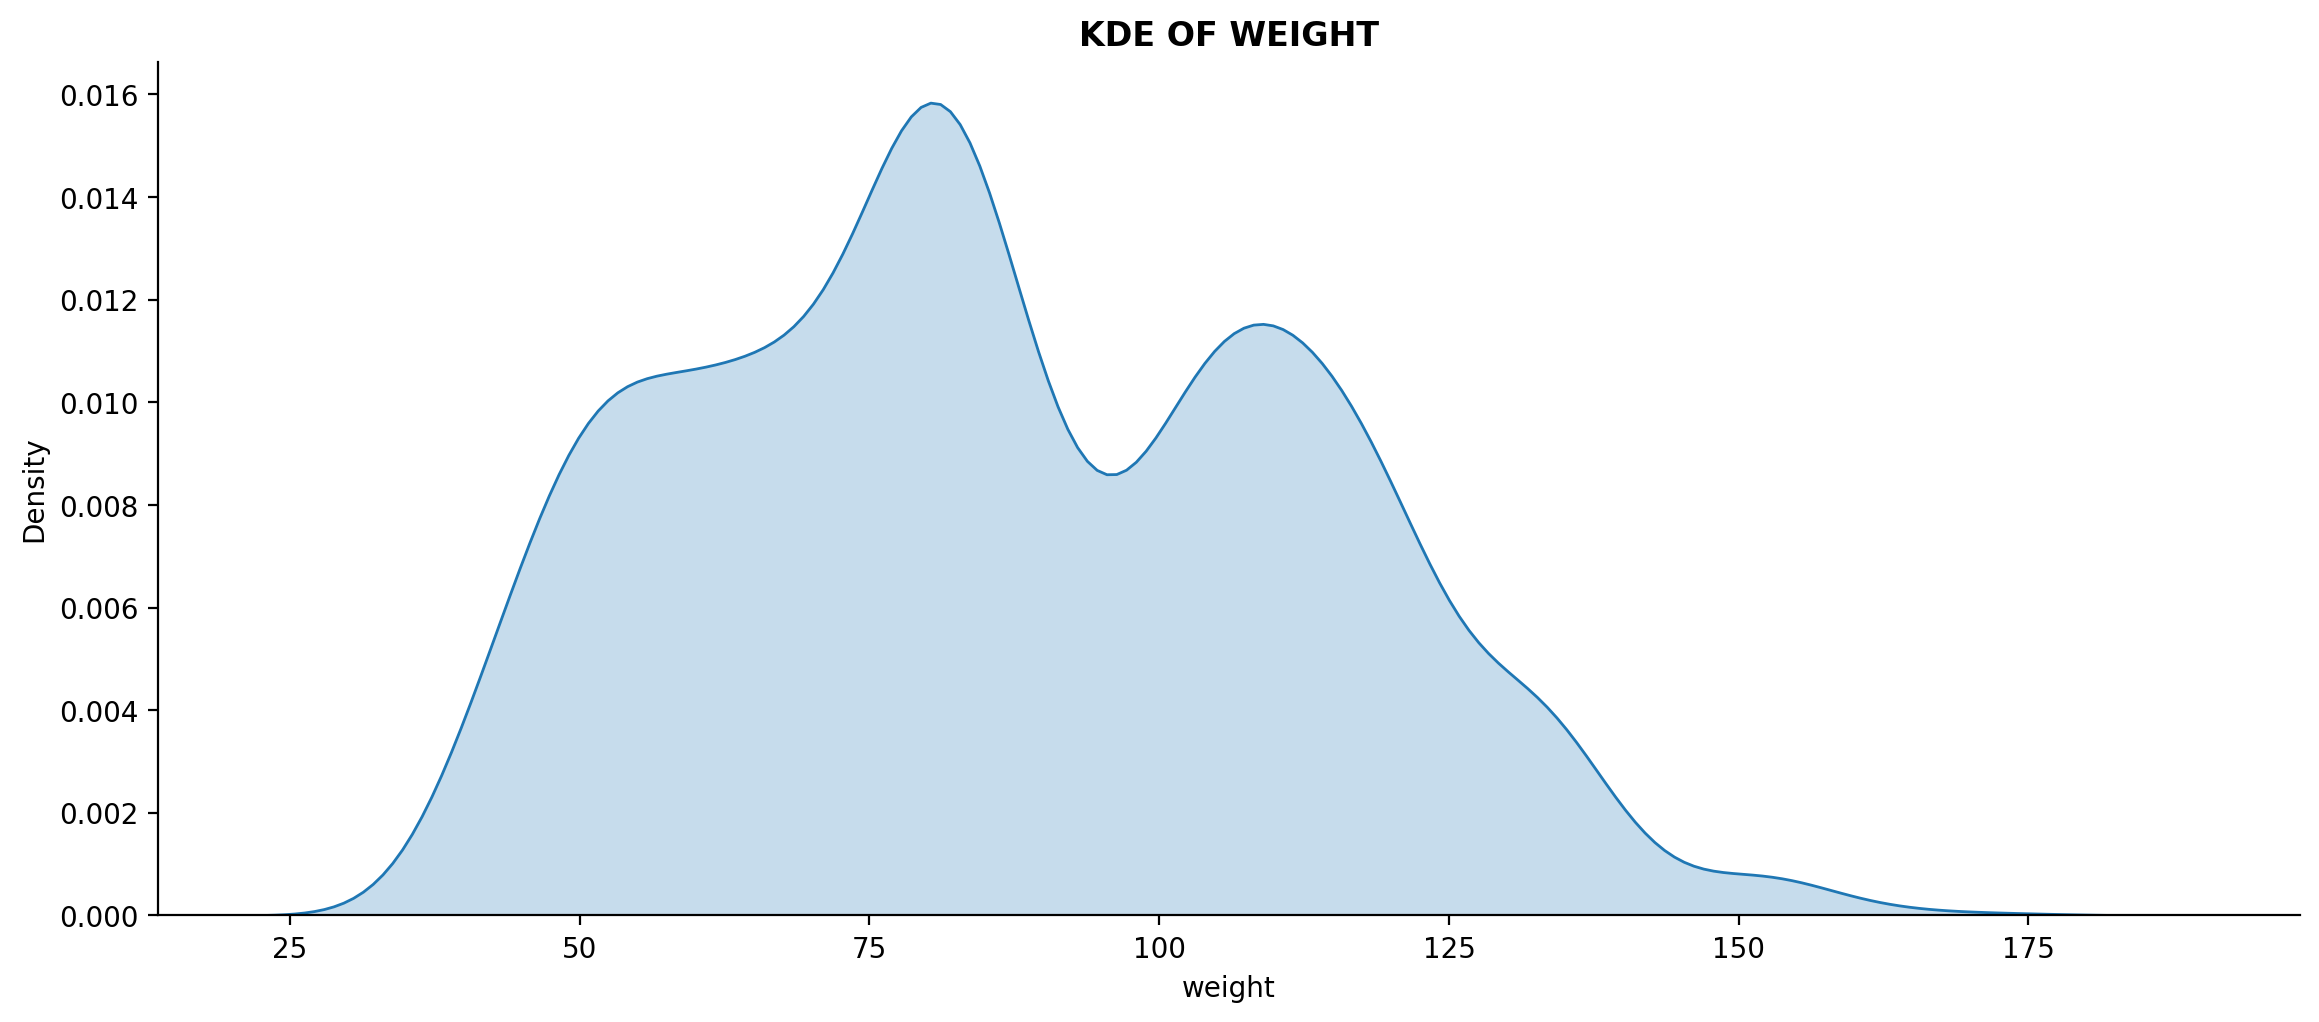

In [21]:
sns.displot(data=df, x='weight', kind='kde',fill=True,height=5, aspect=11.7/5)
plt.title('KDE OF WEIGHT',weight='bold')
plt.show()

The distribution charts shows the density of population in different weights. We can observe that most of population are in the rage from 75 to 85 kilos.

### Figure 4: The pie chart of alcohol consumption

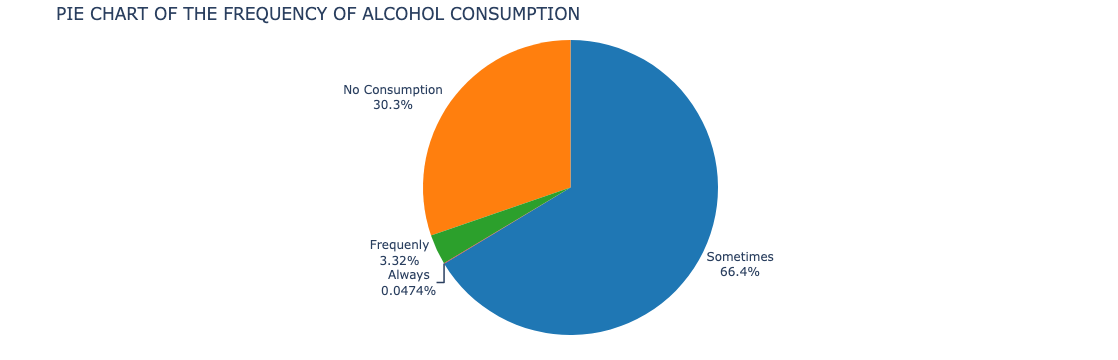

In [22]:
data=df['frequenly_alcohol_consume'].value_counts().tolist()
keys=['Sometimes','No Consumption','Frequenly','Always']
fig = px.pie(
    df,
    values=data,
    names=keys,
    title='PIE CHART OF THE FREQUENCY OF ALCOHOL CONSUMPTION',
    color_discrete_sequence=px.colors.qualitative.D3,
)
fig.update_traces(text=keys,
                  textposition="outside")
fig.update_layout(
    width=600,  
    height=350,  
    margin = dict(t=40, l=50, r=25, b=25),
    showlegend=False)

fig.show()

The pie chart show us the percentage of alcohol consumption in the population. 66.4% of people sometimes drank alcohol, which is double the 
number of people did not consume alcohol. The following are frequent consumption and always consumptions with 3.32% and 0.0474% respectively.

## Two variable plot

### Figure 5: Box Plot of Obesity Level by Age

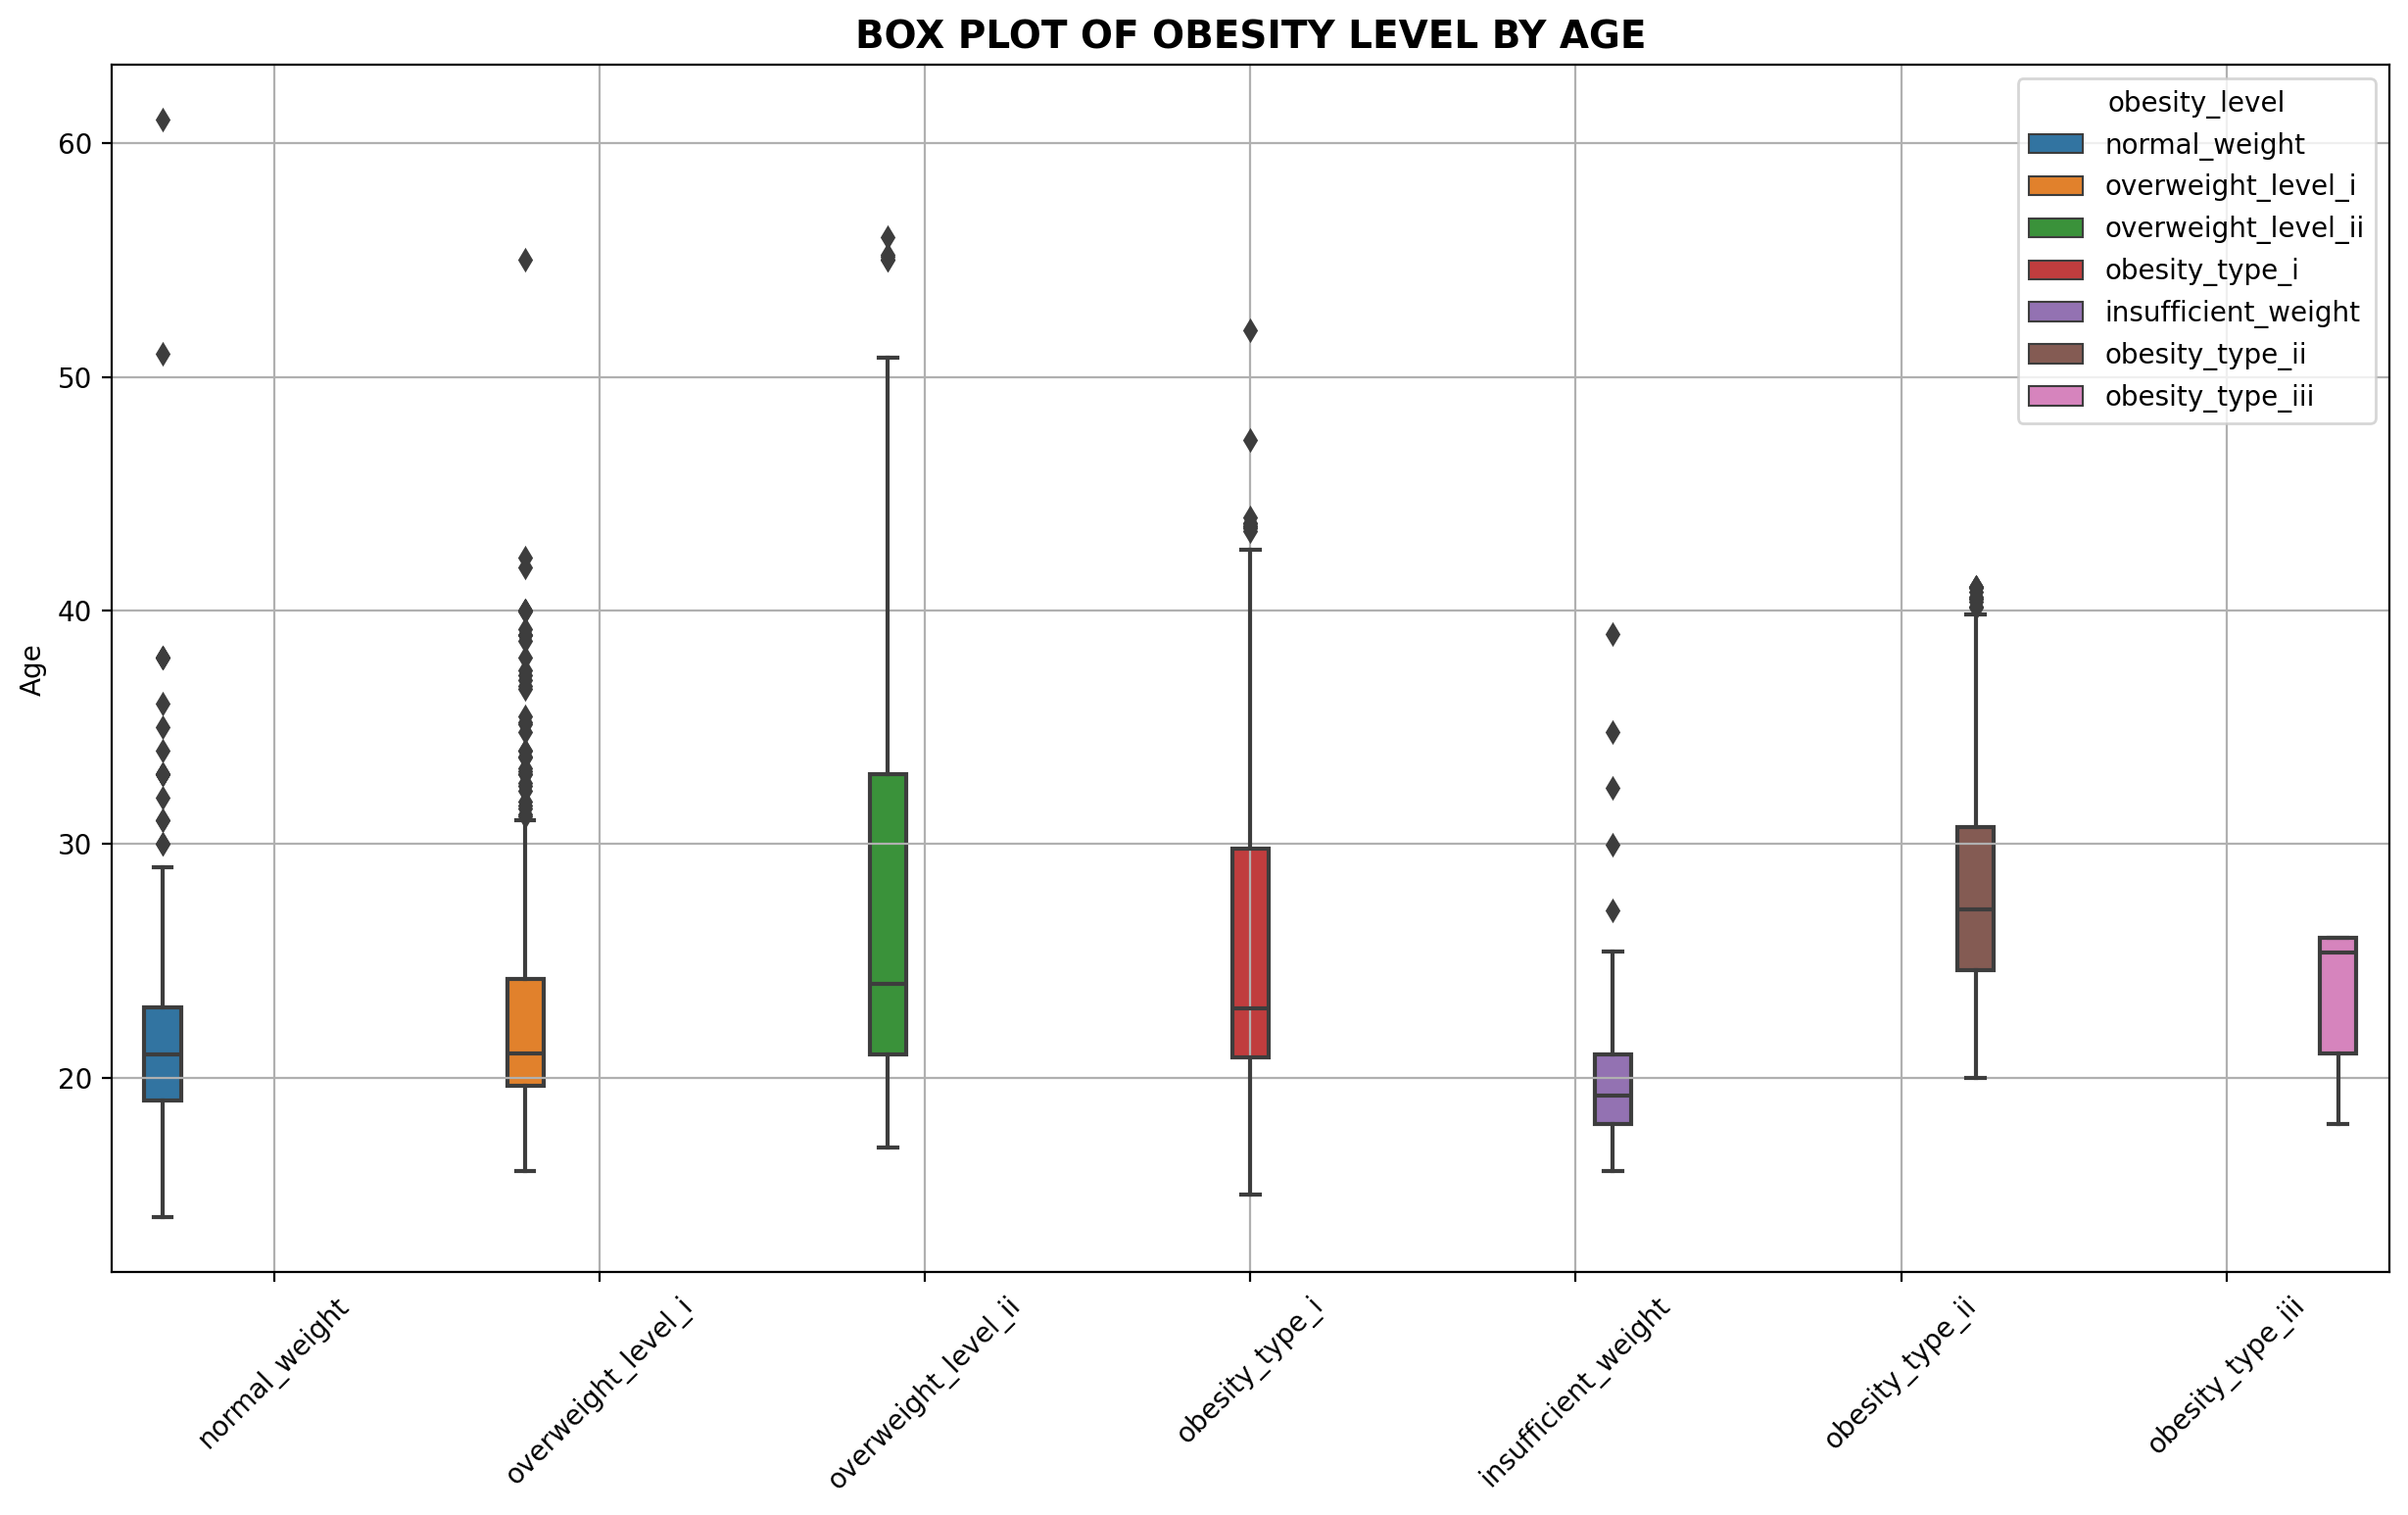

In [23]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='obesity_level', y='age',hue='obesity_level')
plt.ylabel('Age')
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('BOX PLOT OF OBESITY LEVEL BY AGE',fontsize=14,weight='bold');

The boxplot compares obesity levels by ages. Most of observation are under 30 years old. The range of age having overweight levels are biggest, followed by obesity type 1. Most of obesity_levels are right-skewd.

### Figure 6: Bar chart of Average Physical Activity per Week of Each Obesity Class

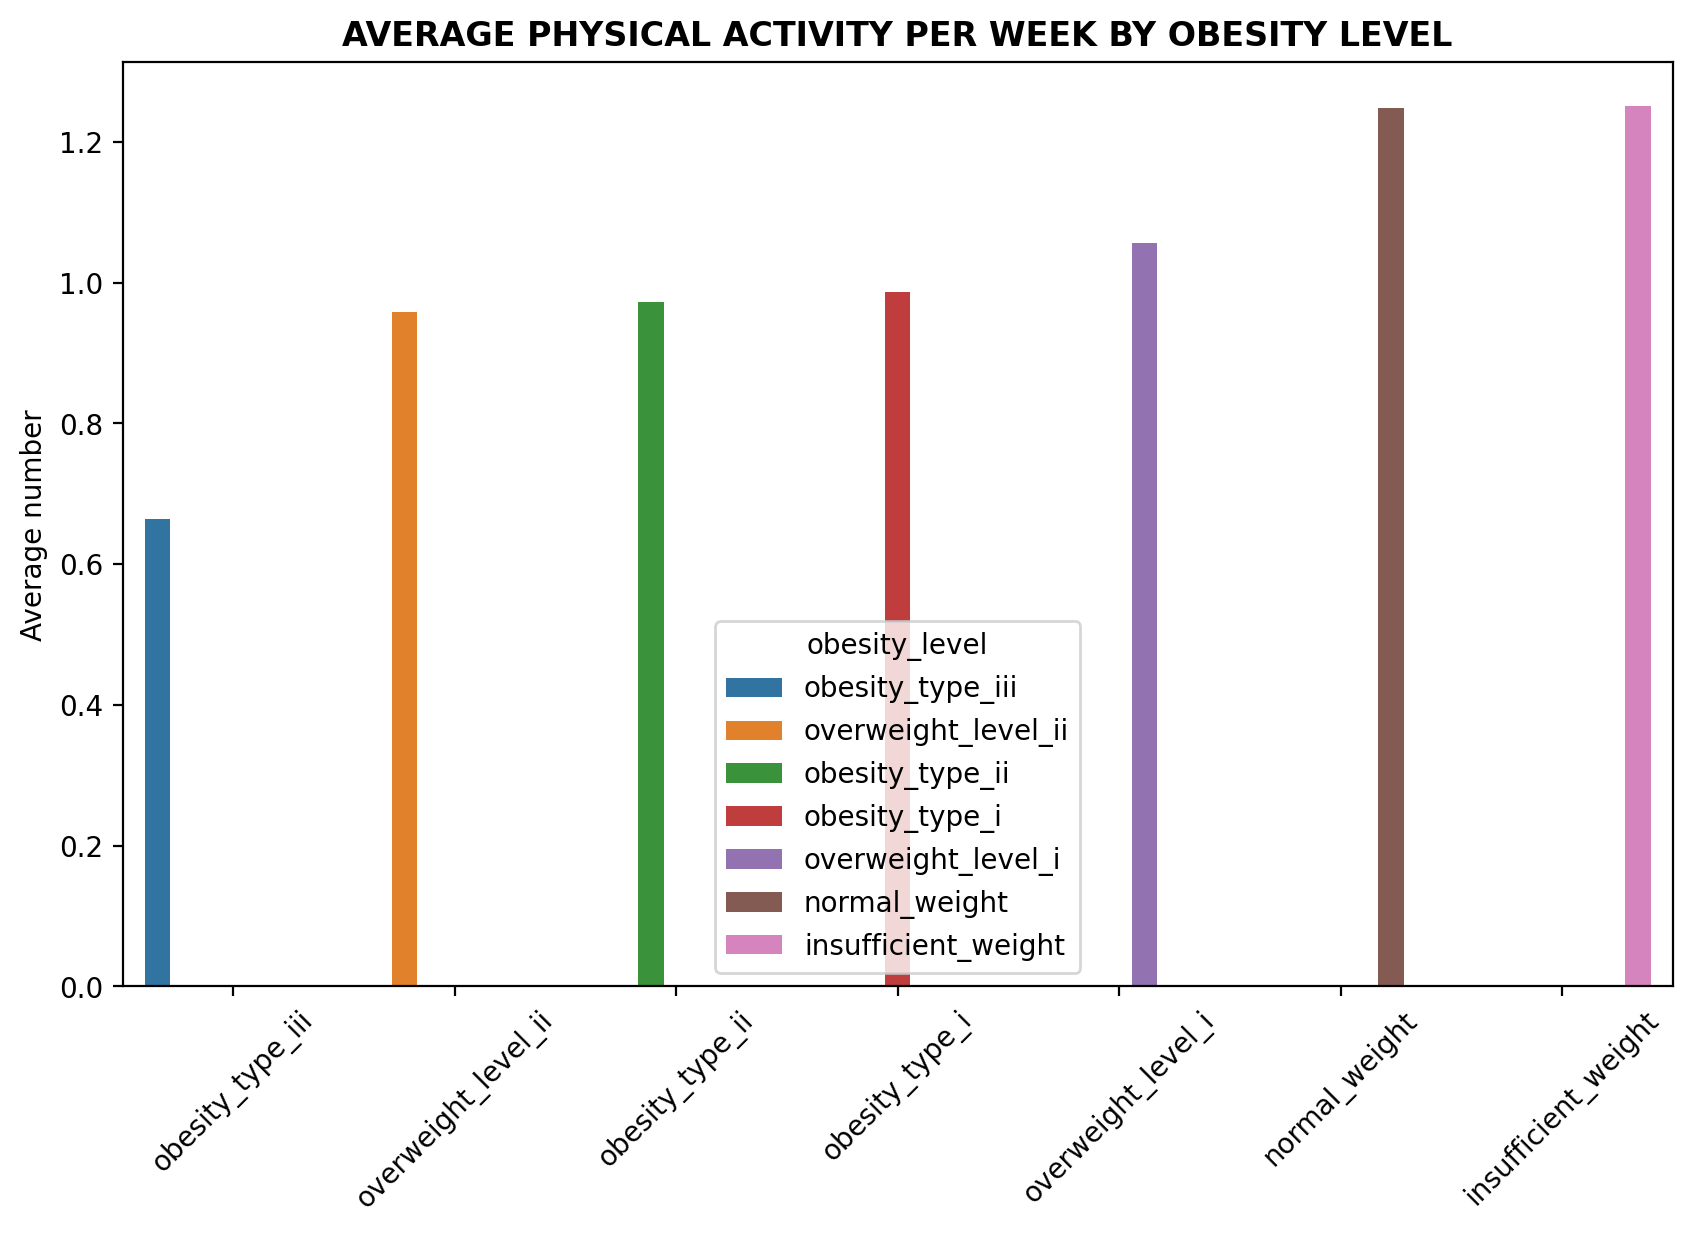

In [24]:
a = df.groupby('obesity_level')[['physical_activity_per_week']].mean().sort_values(by='physical_activity_per_week')
a = a.reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=a, x='obesity_level', y='physical_activity_per_week', hue='obesity_level')
plt.title('AVERAGE PHYSICAL ACTIVITY PER WEEK BY OBESITY LEVEL', weight='bold')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Average number')
plt.show()

As we can see from the chart, the more exercise and weekyly activity the population do, the higher probability of avoiding overweight and
obesity they have. Normal_weight and insufficient weight people did more physical activity than the other groups, while obesity type 3 had the lowest physical activity per week.

### Figure 7: Scatter plot of age and time using electronic devices

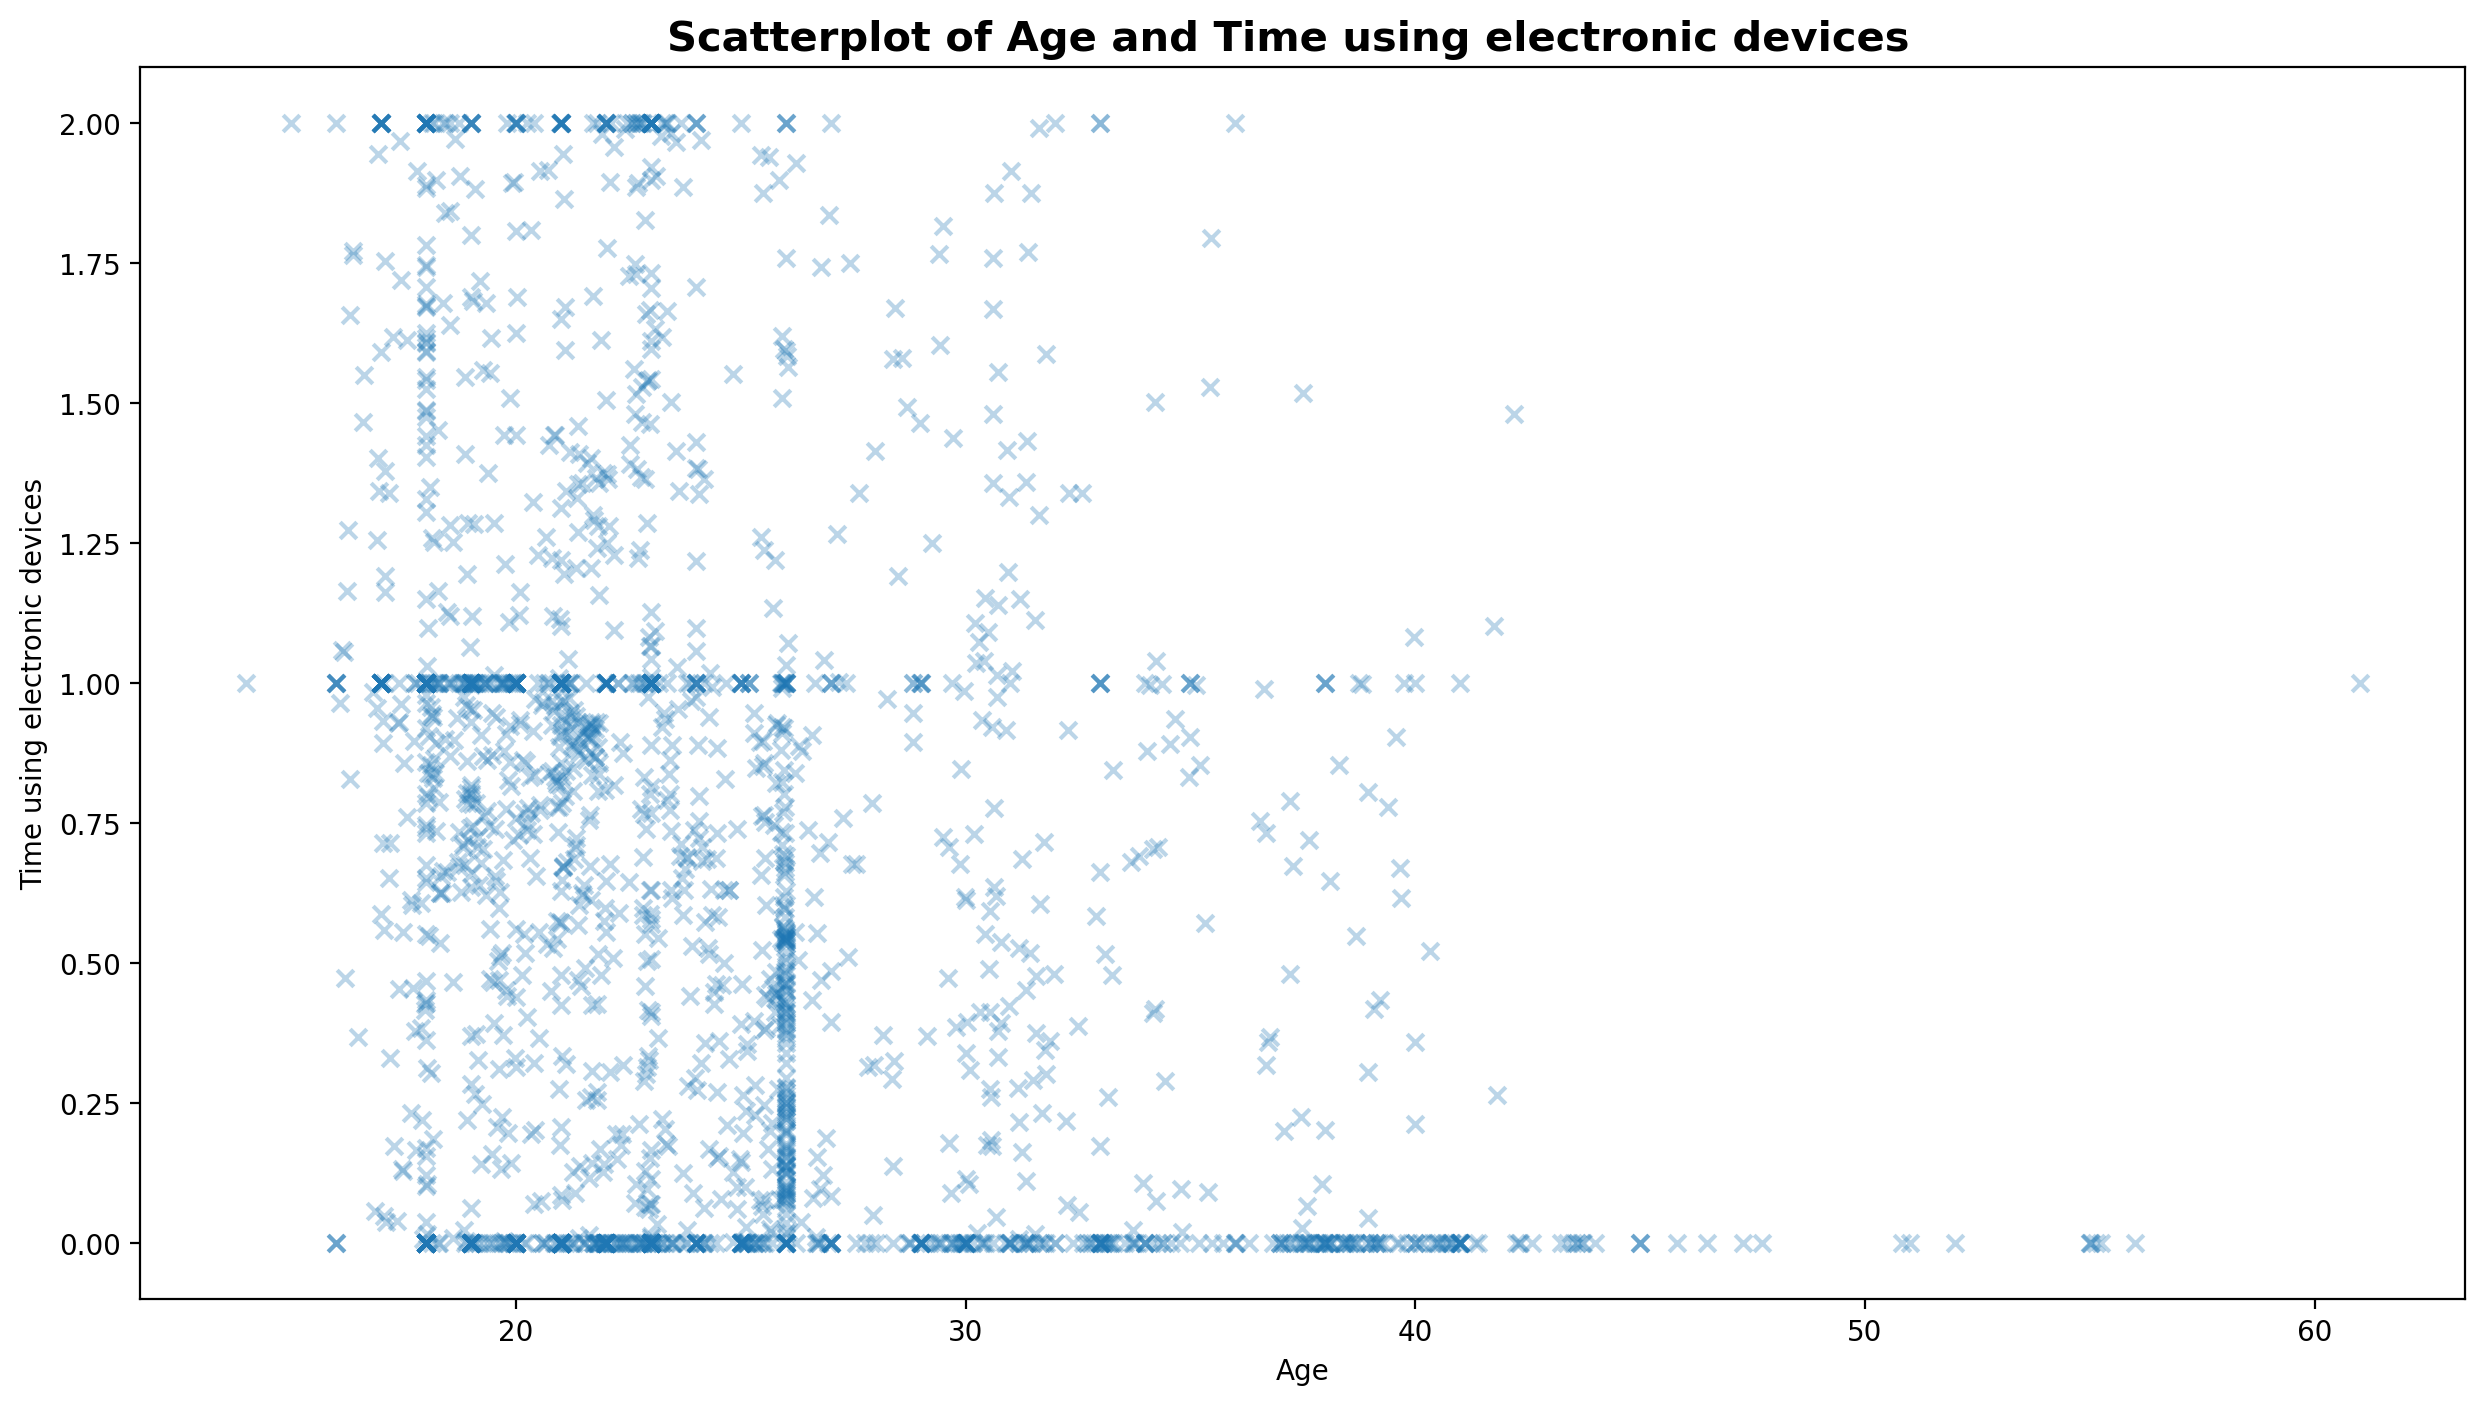

In [25]:
plt.figure(figsize = (15,8))
plt.scatter(df['age'], df['electronic_device_use_hour'], alpha = 0.3,marker='x')
plt.title('Scatterplot of Age and Time using electronic devices  ', fontsize = 15,weight='bold')
plt.xlabel('Age')
plt.ylabel('Time using electronic devices')
plt.show();

The scatter plot points out that people aged from 20 to 27 spent more time on electronic devices than other ages. This might be one of reasons causing overweight and obesity in young generation.

### Figure 8: Stacked Bar Chart of Main Meals in Obese People

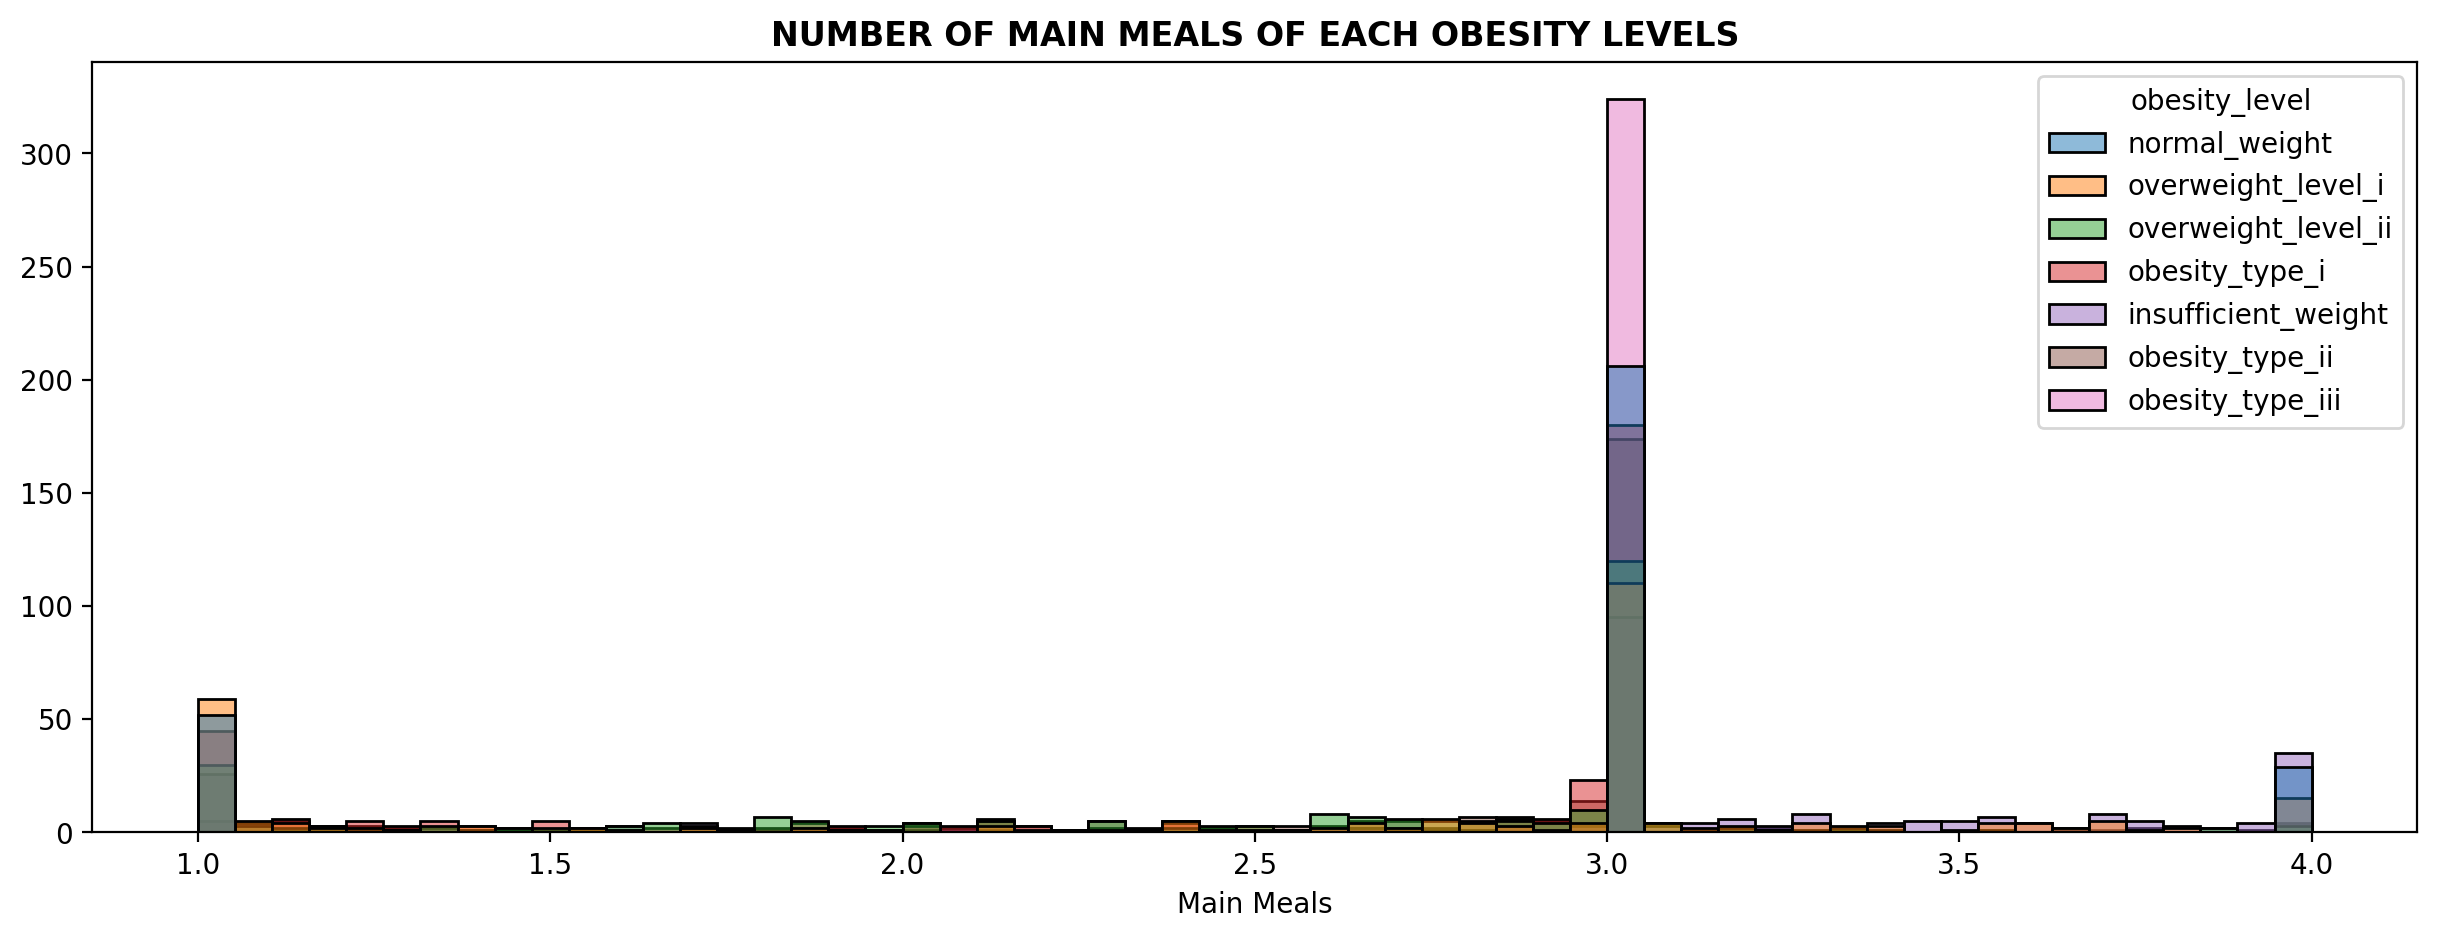

In [26]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,x=df['main_meal_per_day'],hue=df['obesity_level'])
plt.title("NUMBER OF MAIN MEALS OF EACH OBESITY LEVELS", weight='bold')
plt.xlabel('Main Meals')
plt.ylabel('')
plt.show()

The figure demonstrates that most of interviewd people have 3 main meals a day, regardless of their obesity levels. Number of main meals might not affect people's weight generally.

## Three Variables

### Figure 9: Distribution plot of age, family history and gender 

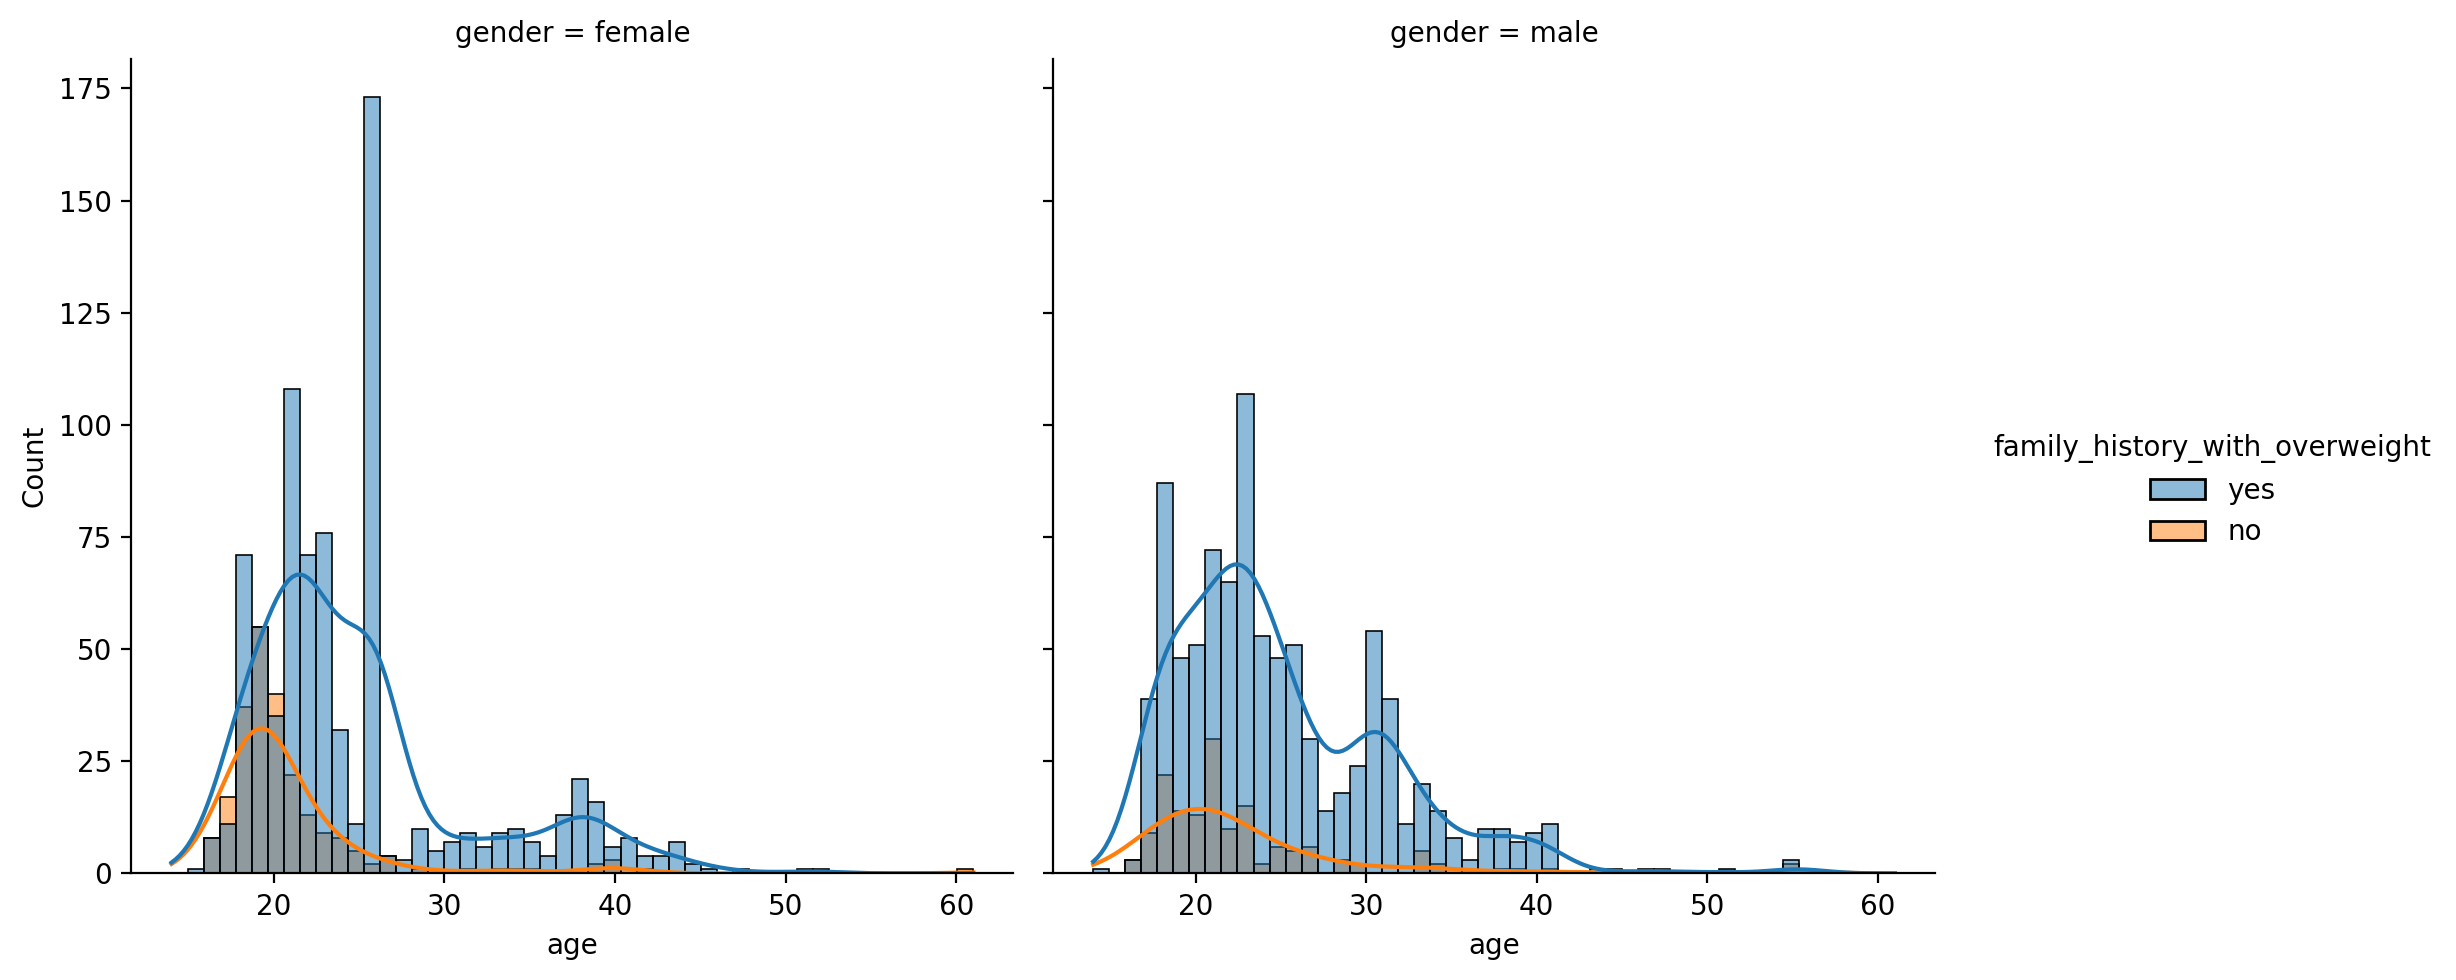

In [27]:
sns.displot(data=df, x='age', col='gender', hue='family_history_with_overweight',kde=True)
plt.show()

As we can see, family history and age has a significant effect on human weight regardless of gender. 

### Figure 10: Distribution of Age, Height and Weight

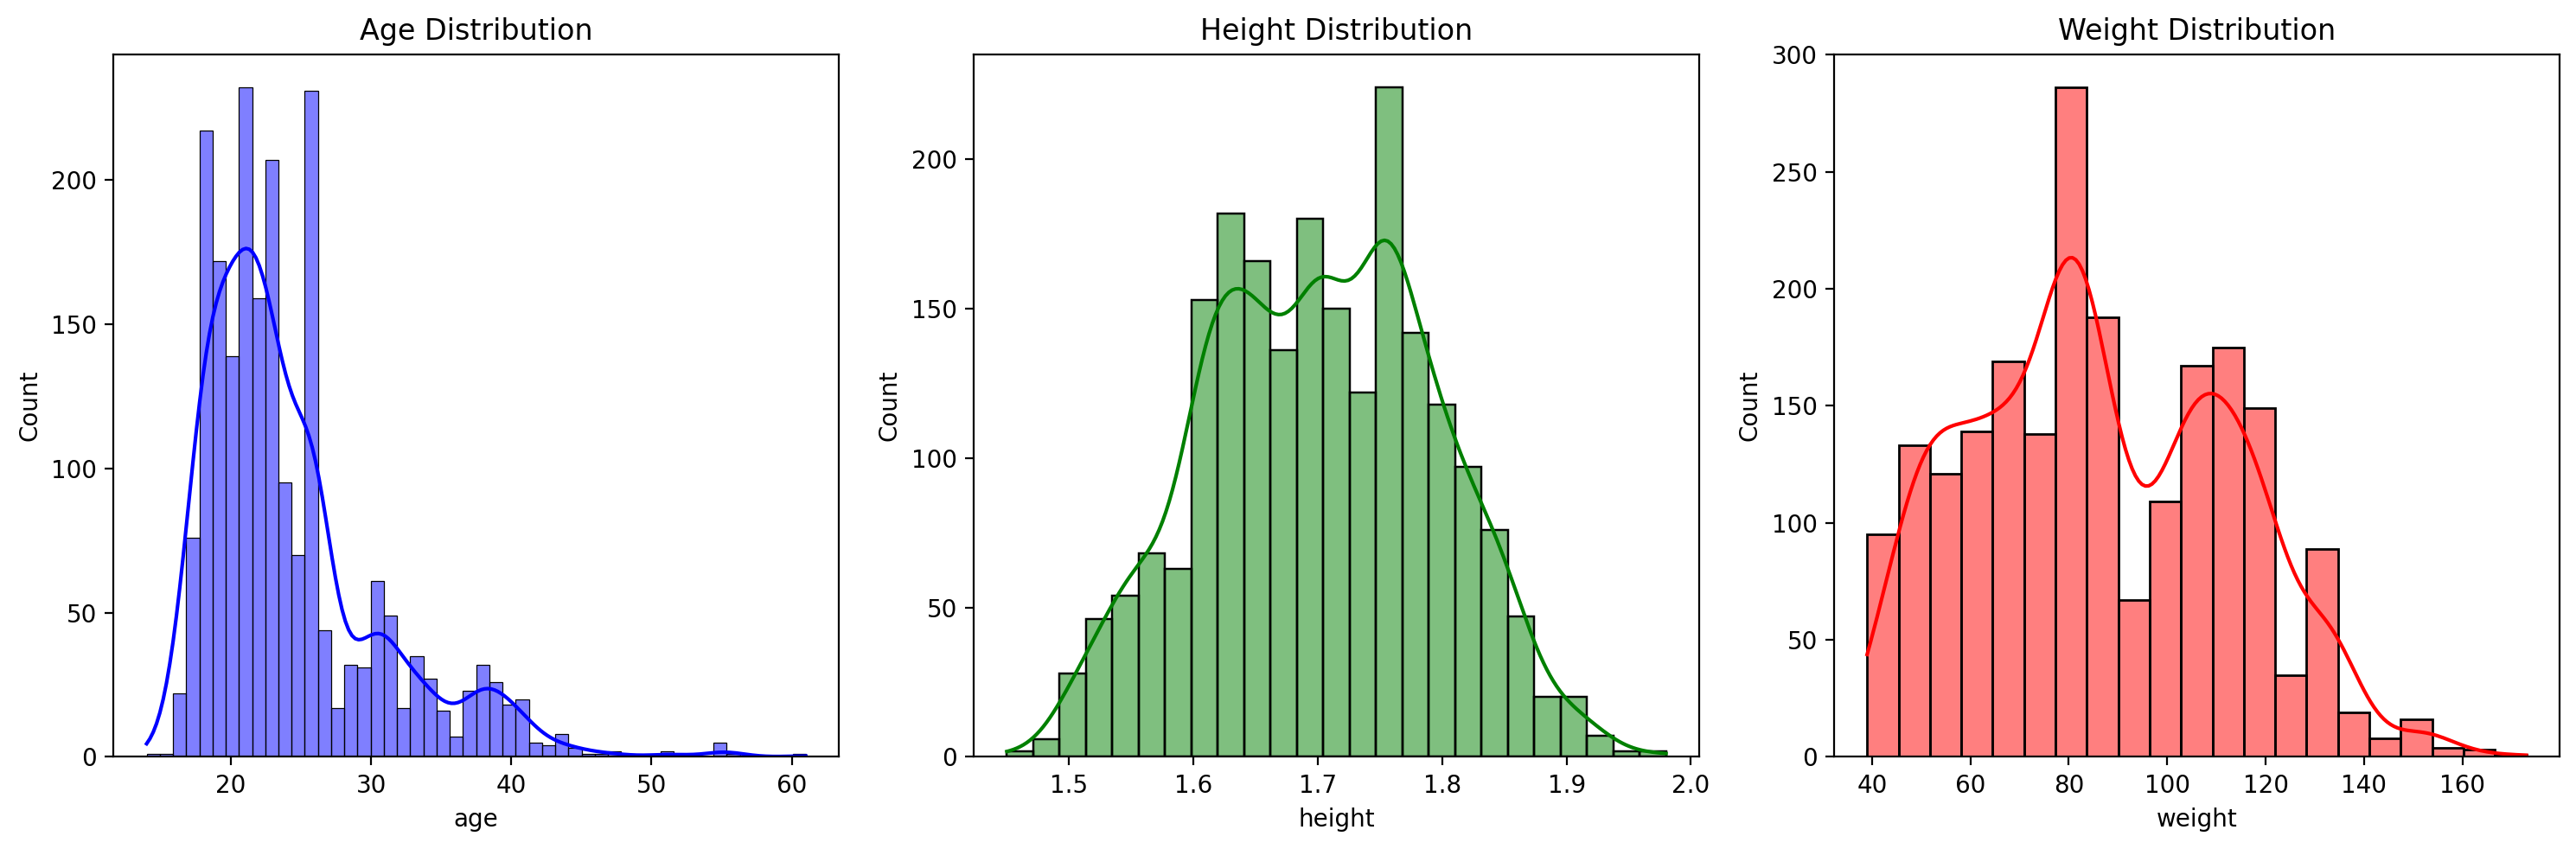

In [28]:
# Create a figure for plotting
plt.figure(figsize=(15, 5))

# Plotting histograms for Age, Height, and Weight
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['height'], kde=True, color='green')
plt.title('Height Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['weight'], kde=True, color='red')
plt.title('Weight Distribution')

# Show the plots
plt.tight_layout()
plt.show()

The Age Distribution is right skewd, which mean the age population of dataset is younger and may not give the good picture of a whole population.While height distribution is normality, weight distribution is not and having high variance.

### Figure 11: Scatter plot of the relationship of Height and weight on Obesity

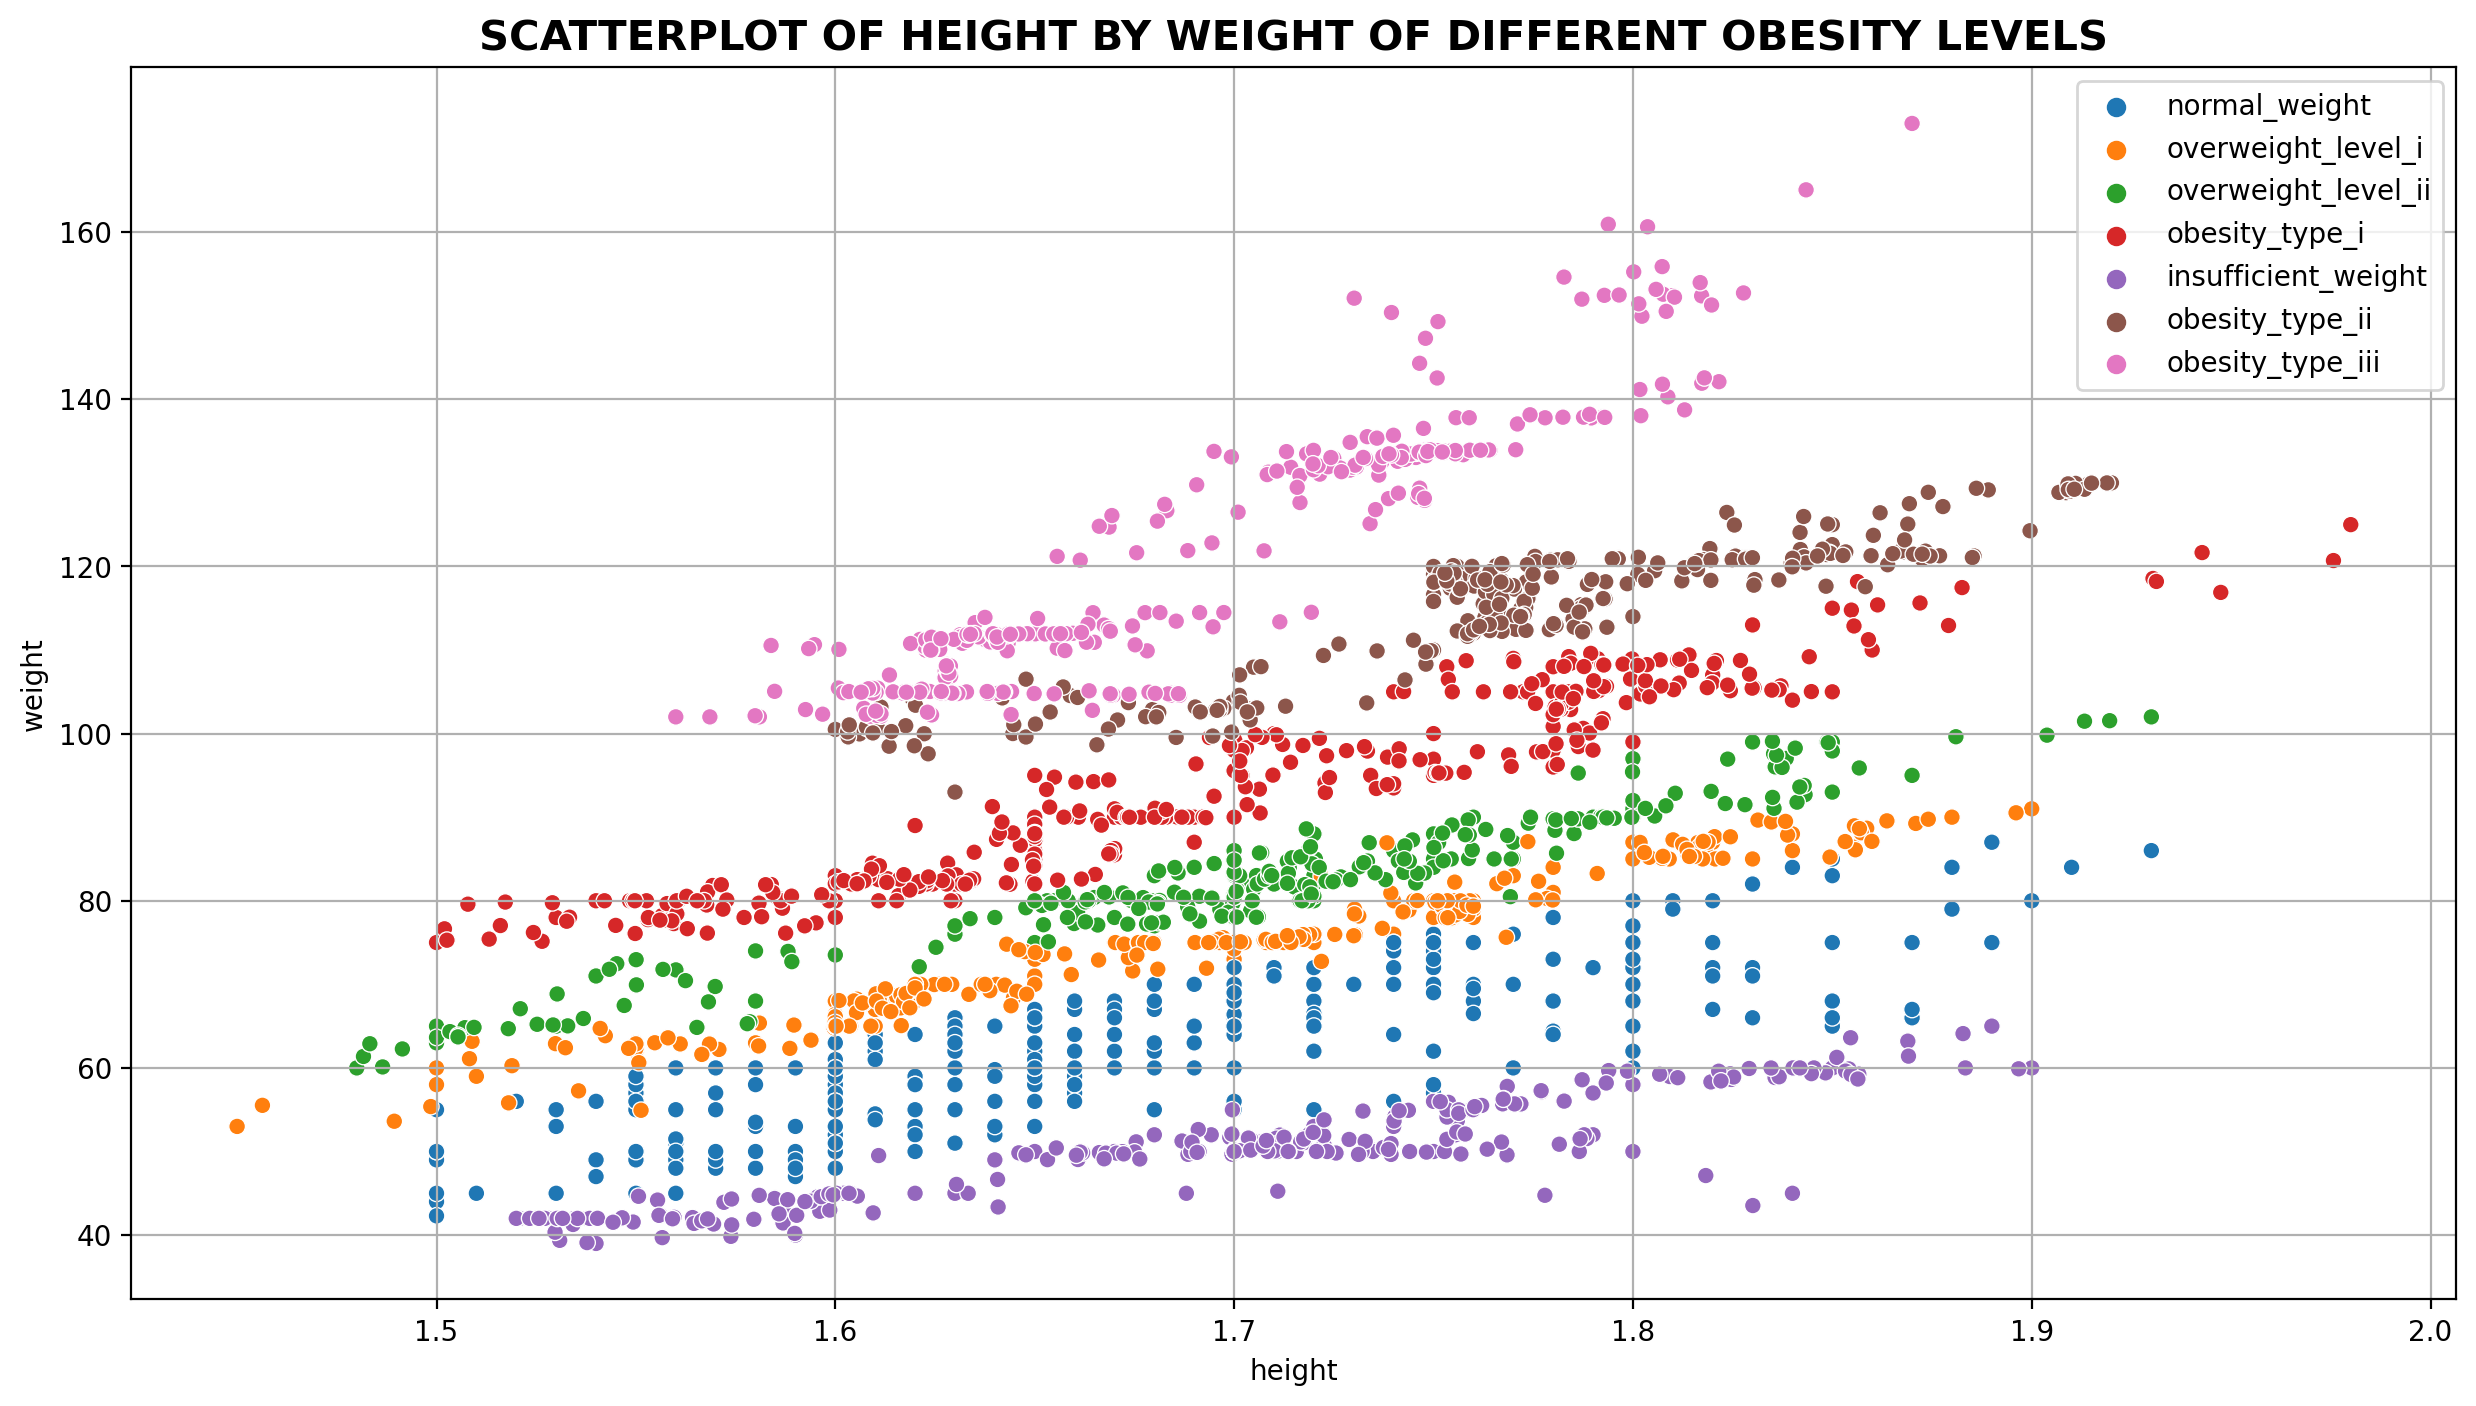

In [29]:
plt.figure(figsize = (15,8))
sns.scatterplot(x=df['height'], y=df['weight'], hue = df['obesity_level'])
plt.title('SCATTERPLOT OF HEIGHT BY WEIGHT OF DIFFERENT OBESITY LEVELS', fontsize = 15,weight='bold');
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show();

It is clear to see from the plot that there might not have effect of height and weight on obesity levels 

### Figure 12: Violin Plot of relationship between calories intake and weight management

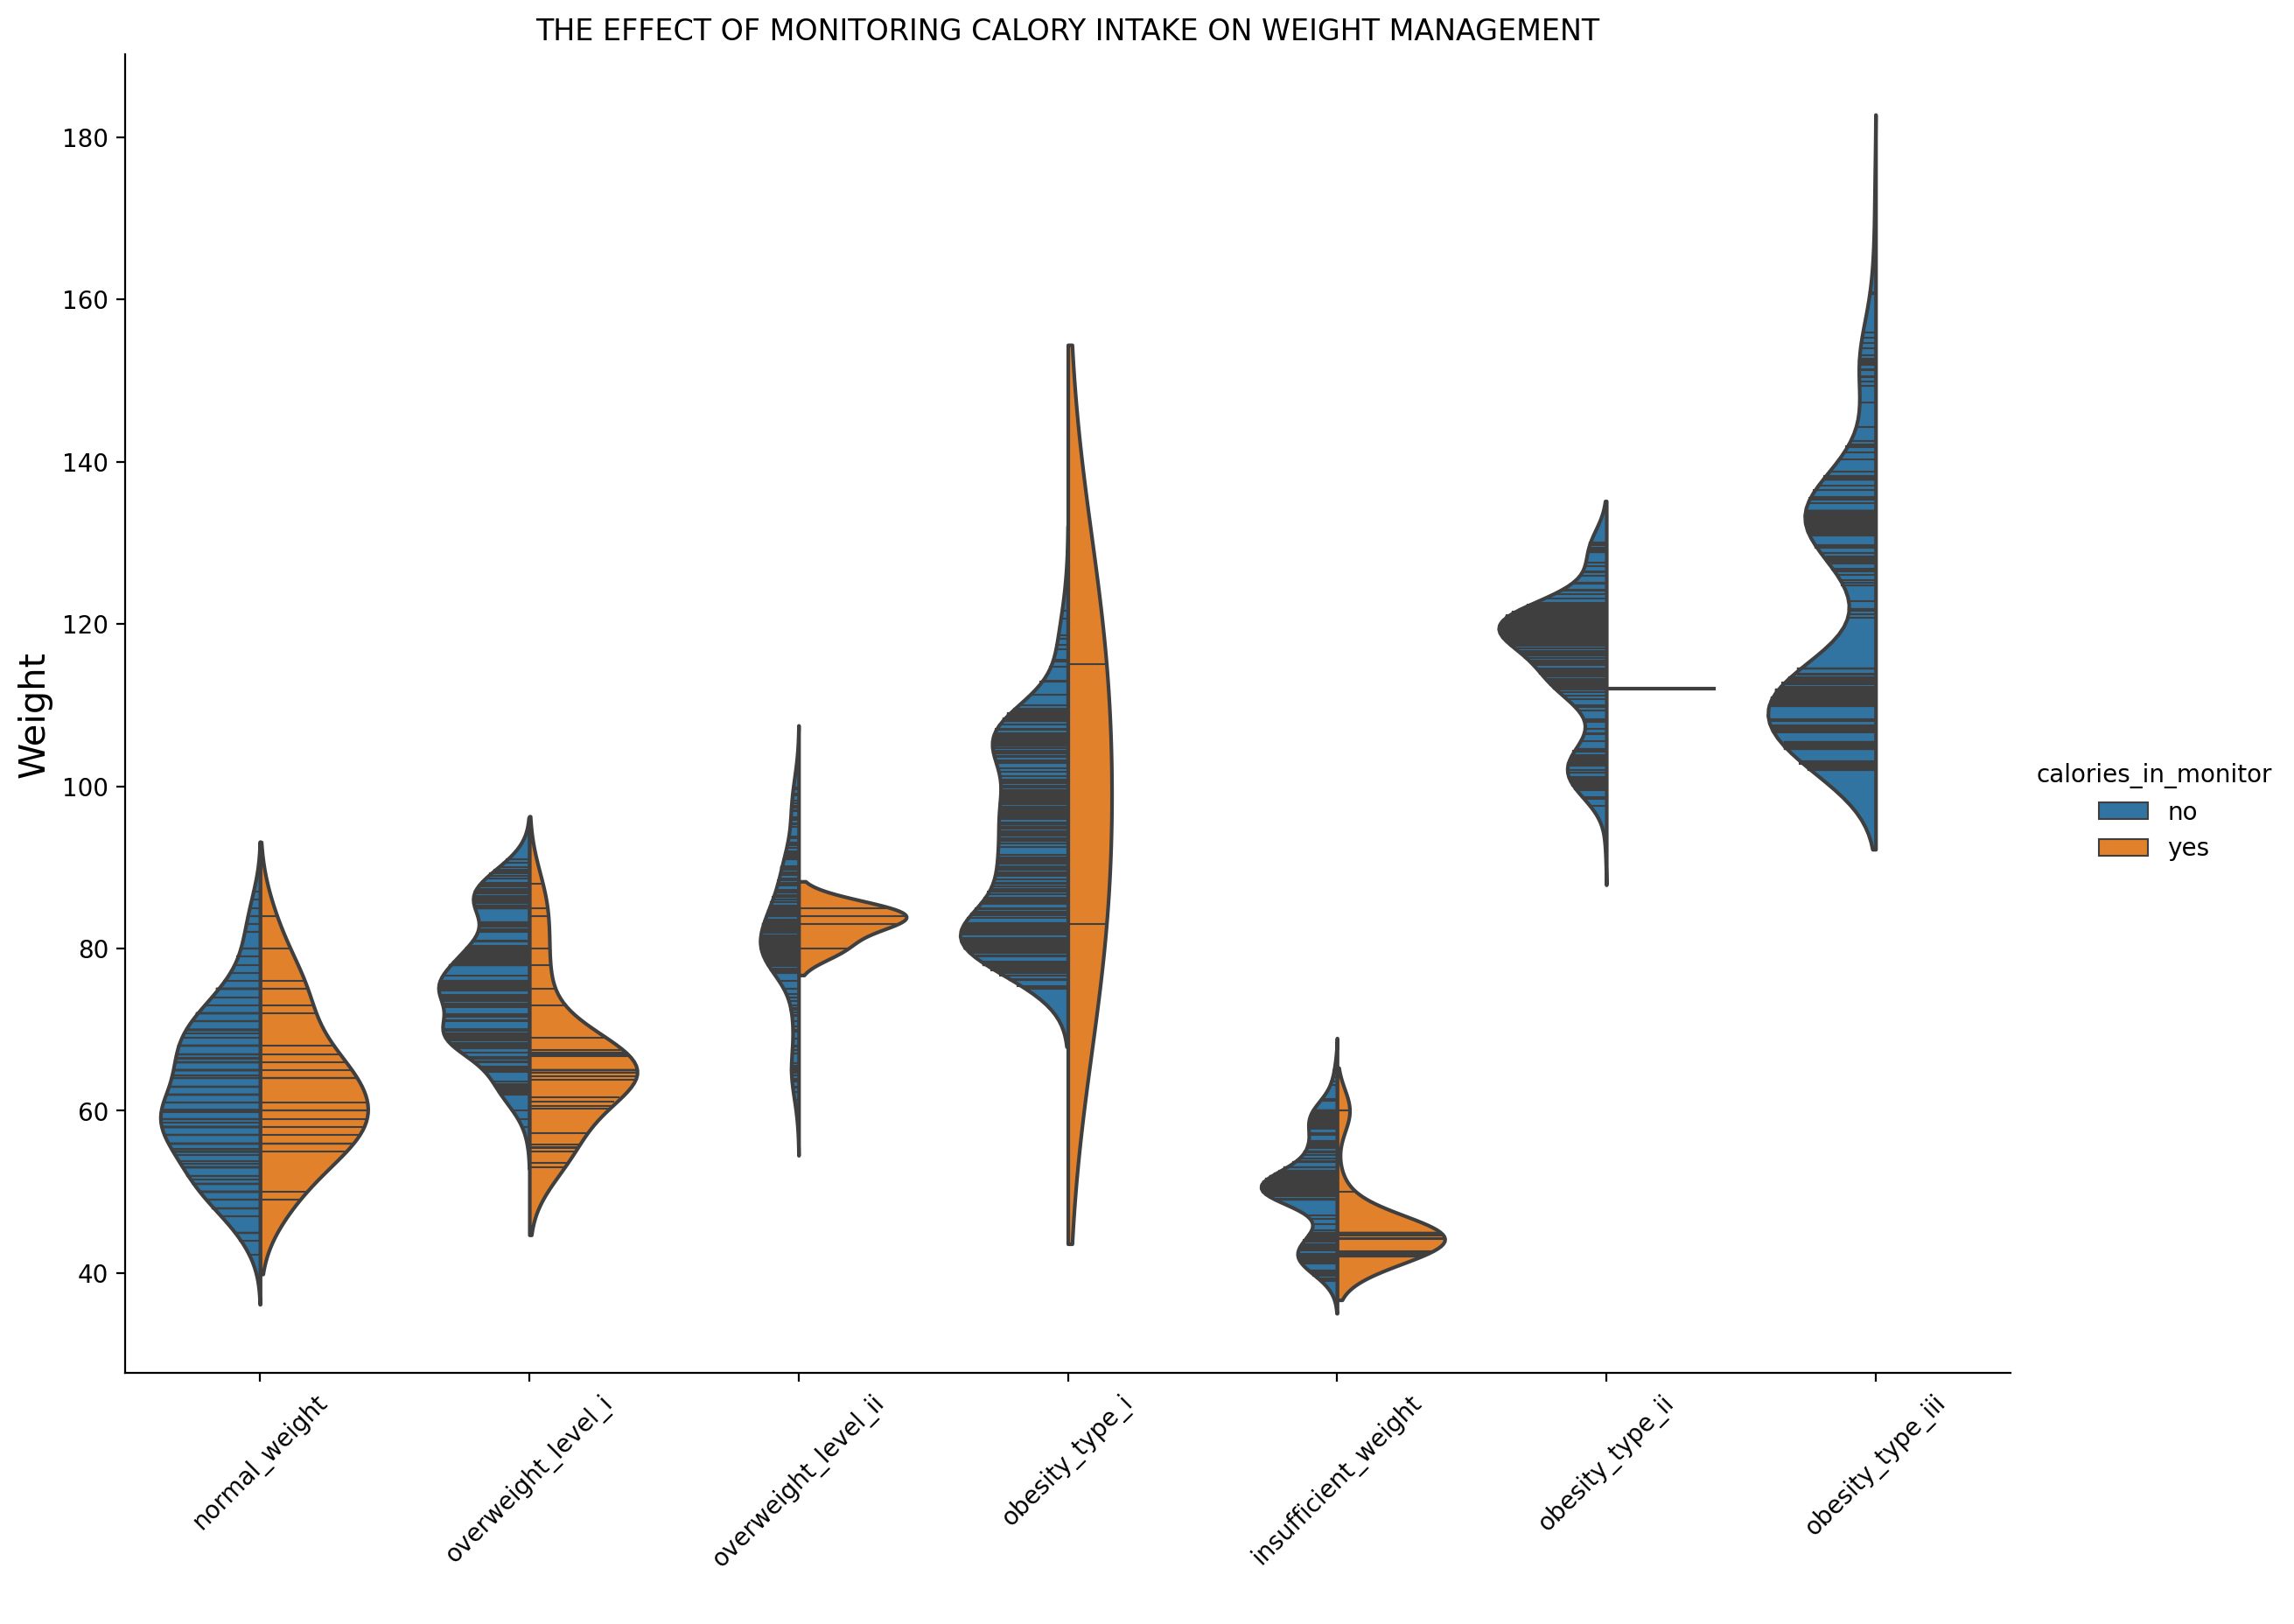

In [30]:
sns.catplot(
    data=df, x="obesity_level", y="weight", hue="calories_in_monitor",
    kind="violin", inner="stick", split=True,height=8.27, aspect=11.7/8.27
)
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.ylabel('Weight',fontsize=15)
plt.title('THE EFFECT OF MONITORING CALORY INTAKE ON WEIGHT MANAGEMENT')
plt.show()

The violin plot demonstrates the importance of monitoring calories intake to weight, which is a factor to evaluate obesity level. Controlling calories intake  can help people controlling weight as people monitoring their calories tends to avoid all types of obesity. 

## Literature review <a id='Lit-review'></a>


Obesity is a critical problem that poses health emergency for any country and community. There are many negative effects that obesity impacts on people’s life. According to Han & Lean, obesity can lead to metabolic syndrome, a cluster of conditions such as high blood pressure and high blood sugar, which ultimately increases the risk of heart-related diseases. (Han & Lean, 2016). The article by Djalalinia and colleagues analyse extensive health consequences of obesity, highlighting its serious physical, mental, social, and spiritual impacts. It includes depression, low esteem, mood disorder, facing discrimination in educational, professional and healthcare environment. Spiritually, the study notes a connection between poor spiritual health and emotional eating, especially in women (Djalalinia et al,. 2015). The 2021 Nutrition Society Winter Conference by Hall (2022) focused on the consequences of obesity on brain health, discussing how it negatively affects cognitive functions and memory. It also explored various related topics, such as the impacts of artificial sweeteners, new approaches to treating binge eating disorders, and how obesity can lead to cognitive decline.

The reason behind obesity, according to Lin and Li (2021) is complex causes of the global obesity epidemic, emphasising the important roles that genetics, environment, and lifestyle choices. In order to evaluate which factor has the most impact on obesity, many model based on machine learning has been built which brought slightly different results.In the study  of Thamrin and his colleagues (2021), significant factors affecting obesity included demographic and lifestyle such as location, marital status, diet (including consumption of sweet drinks, fatty/oily foods, and alcoholic drinks), and lifestyle behaviors (such as physical activity and smoking). The Logistic Regression method was identified as the most effective among models that applying these factors to predict obesity status in adults (Thamrin et al., 2021). Another study from Yagin and colleague used machine learning to predict obesity levels based on food habits and physical activity. It discovered that eating habits, alcohol intake, and physical activity all had a substantial impact on obesity. The research achieved great accuracy in diagnosing obesity levels by highlighting the crucial significance of certain eating behaviours and physical activity in obesity prediction, using a trained neural network optimised using Bayesian approaches (Yagin etal.,2023). In the study of Gozukara Bag and colleagues (2023) examined dietary patterns and physical activity levels to identify obesity levels using a tree-based machine learning algorithm. Based on health-related behaviours, it was discovered that XGBoost, random forest, and logistic regression models are all good at predicting obesity. The greatest results were produced by the logistic regression model, particularly when feature selection was used to increase prediction efficiency and accuracy. This emphasises how important it is to manage obesity with individualised interventions based on each person's activity level and food preferences (Gozukara Bag et al,. 2023). One of the most common methods to resolve obesity is weight management through diet and exercise in mitigating these risks, with additional discussion on the potential roles of pharmacological treatments and bariatric surgery for more severe cases (Han & Lean, 2016). In the Nordic Obesity Meeting ,experts states that both external and internal motivation impact physical activity, with highly motivated people being less impacted by their surroundings than lowly motivated people (Aasheim et al,. 2009). Changes in the environment should concentrate on making activities more pleasurable, accessible, and affordable in order to encourage physical activity across all age groups. Local communities have a significant role in putting these changes into action with funding from the state (Aasheim et al,. 2009).
The conclusion of the 9th International Conference on Obesity by Wang highlighted the urgent need for innovative treatments for obesity, given its increasing prevalence and severe health consequences. In order to identify novel pharmaceutical targets, conference discussions emphasised the significance of expanding research in cutting-edge disciplines like functional genomics and proteomics. Such developments are essential for creating safe and effective treatments tailored to the needs of obese patients (Wang 2009)
The conference emphasised the links between obesity and oral health by Tinanoff & Holt, especially when looking at sugar consumption as a risk factor for both conditions. The main goals were to increase awareness of the connection between obesity and dental health, advocate obesity prevention techniques, and encourage teamwork to reduce paediatric obesity. The publications and discussions that followed highlighted tactics that oral health practitioners can use to combat and prevent childhood obesity. These tactics include recommending that kids consume less sugar, screening for obesity, and referring children who are at-risk for nutritional counselling (Tinanoff & Holt 2017)
Opportunity and Chalenge of Applied Machine Learning in Healthcare field:
This review offers a thorough overview of the several artificial intelligence approaches used in the field of obesity research, with a focus on machine learning and deep learning. In order to promote further adoption and innovation in AI within obesity research, the article outlines potential future trends, including multimodal AI models, synthetic data generation, and human-in-the-loop approaches. It also details how AI has been effectively used to measure, predict, and treat obesity-related outcomes by analysing various data types (An et al., 2022).

By enabling comprehensive disease management, predictive analytics, and enhanced patient care through the analysis of massive volumes of data from sources including imaging, genetic research, and electronic health records, big data in healthcare is revolutionising the sector. Modern medicine and patient care strategies are advanced by this broad data integration, which improves operational efficiency of healthcare services and allows for the customisation of personalised treatment programmes (Dash et al., 2019)

However, many issues arise when using big data in healthcare, such as managing massive amounts of different and quickly created data, guaranteeing data veracity, and protecting privacy and security. To fully utilise Big Data's promise to enhance patient outcomes through better informed decision-making and individualised treatment plans, these obstacles must be removed. Furthermore, for successful deployment, it is imperative to address the notable skills gap in data science within the healthcare workforce and integrate Big Data analytics into the current healthcare systems 

## Summary and Conclusion: <a id='Summary-and-Conclusion'></a>


Accuracy predict healthcare will help obeses people have more chance to prevent worst scenario while helping healthcare system give proper treatment to overcome the situation. Our goal is ennhancing the predictive accuracy of the model to determine obesity levels, facilitating improved preventative measures and treatment approaches in healthcare.
In the first phase of our project, we concentrated on data preprocessing and cleaning. We opted to retain all variables within our dataset, each deemed crucial for the accuracy of our obesity prediction model. This comprehensive approach helps ensure that no potential predictive factors are omitted. The integrity of the data was reinforced through meticulous checks for missing values and outliers, aiming to enhance the reliability and robustness of the subsequent analysis.
Our preliminary analysis revealed several notable trends: a predominant prevalence of overweight and obesity conditions within the population studied, regular water consumption paired with occasional alcohol intake, and a significant lack of physical activity. Notably, the usage of electronic devices emerged as a potential risk factor for obesity among individuals aged 20-30. Additionally, family history was identified as a contributing factor to obesity levels.

## References: <a id='References'></a>

Aasheim, E. T., Svendsen, M., Pollestad Kolsgaard, M., Tonstad, S., & Hjelmesæth, J. (2009). Nordic Obesity Meeting. Obesity Facts, 2(4), 255–268. https://doi.org/10.1159/000237732

An R, Shen J, Xiao Y. Applications of Artificial Intelligence to Obesity Research: Scoping Review of Methodologies. J Med Internet Res. 2022 Dec 7;24(12):e40589. doi: 10.2196/40589. PMID: 36476515; PMCID: PMC9856437.

Dash, S., Shakyawar, S. K., Sharma, M., & Kaushik, S. (2019). Big data in healthcare: Management, analysis and future prospects. Journal of Big Data, 6(1), 1–25. https://doi.org/10.1186/s40537-019-0217-0

Djalalinia, S., Qorbani, M., Peykari, N., & Kelishadi, R. (2015). Health Impacts of Obesity. Pakistan Journal of Medical Sciences, 31(1). https://doi.org/10.12669/pjms.311.7033

Fruh S. M. (2017). Obesity: Risk factors, complications, and strategies for sustainable long-term weight management. Journal of the American Association of Nurse Practitioners, 29(S1), S3–S14. https://doi.org/10.1002/2327-6924.12510

Gozukara Bag, H.G., Yağın, F.H., Gormez, Y., González, P.P., Çolak, C., Gülü, M., Badicu, G., & Ardigò, L.P. (2023). Estimation of Obesity Levels through the Proposed Predictive Approach Based on Physical Activity and Nutritional Habits. Diagnostics, 13.

Hall, W. L. (2022). Conference on “Obesity and the brain.” Proceedings of the Nutrition Society, 1–4. https://doi.org/10.1017/s0029665122000799

Han, T. S., & Lean, M. E. (2016). A clinical perspective of obesity, metabolic syndrome and cardiovascular disease. JRSM cardiovascular disease, 5, 2048004016633371. https://doi.org/10.1177/2048004016633371

Lin, X., & Li, H. (2021). Obesity: Epidemiology, Pathophysiology, and Therapeutics. Frontiers in Endocrinology, 12(1). https://doi.org/10.3389/fendo.2021.706978

MEHRPARVAR, F. (2023, April 😎. Obesity Levels. Www.kaggle.com. https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data

Sivarajah, U., Kamal, M. M., Irani, Z., & Weerakkody, V. (2017). Critical analysis of Big Data challenges and analytical methods. Journal of Business Research, 70(1), 263–286. Sciencedirect. https://doi.org/10.1016/j.jbusres.2016.08.001

Thamrin, S. A., Arsyad, D. S., Kuswanto, H., Lawi, A., & Nasir, S. (2021). Predicting Obesity in Adults Using Machine Learning Techniques: An Analysis of Indonesian Basic Health Research 2018. Frontiers in Nutrition, 8. https://doi.org/10.3389/fnut.2021.669155

Tinanoff, N., & Holt, K. (2017). Introduction to proceedings of healthy futures: engaging the oral health community in childhood obesity prevention national conference. Journal of Public Health Dentistry, 77, S5–S7. https://doi.org/10.1111/jphd.12218

Wang, S. (2000). 9th International Conference on Obesity, NIDDM, Adipogenesis and Insulin Resistance. Expert Opinion on Investigational Drugs, 9(7), 1673–1678. https://doi.org/10.1517/13543784.9.7.1673

Yagin, F. H., Gülü, M., Gormez, Y., Castañeda-Babarro, A., Colak, C., Greco, G., Fischetti, F., & Cataldi, S. (2023). Estimation of Obesity Levels with a Trained Neural Network Approach optimized by the Bayesian Technique. Applied Sciences, 13(6), 3875. https://doi.org/10.3390/app13063875